# Exploratory Data Analysis

We will explore the datasets given in Home Credit to understand what happened and what we will do.

In [19]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Application_{Train | Test} Dataset

- This is the main table, divided into two files for Train (with TARGET) and Test (without TARGET). 
- Static data for all applications. One row represents one loan in our data sample.

In [20]:
train = pd.read_csv(r'C:\Users\aldiv\Downloads\Data Analyst\Project based intern\Home Credit\Final Tasks\application_train.csv')
test = pd.read_csv(r'C:\Users\aldiv\Downloads\Data Analyst\Project based intern\Home Credit\Final Tasks\application_test.csv')

In [21]:
data = train
dataset_name = 'Application Train'
print(f'{dataset_name}')
print(f'There are {data.shape[0]} rows data in {dataset_name}')
print(f'There are {data.shape[1]} columns in {dataset_name}')
data.sample(5)

Application Train
There are 307511 rows data in Application Train
There are 122 columns in Application Train


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
236374,373784,1,Cash loans,M,N,Y,0,193500.0,443178.0,32377.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
298792,446148,0,Cash loans,F,N,N,0,126000.0,550980.0,43659.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
120770,240021,0,Cash loans,F,N,Y,0,112500.0,700830.0,20619.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
96178,211658,0,Cash loans,F,N,Y,0,63000.0,296280.0,15255.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
48440,156097,0,Cash loans,F,N,Y,0,67500.0,675000.0,21775.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0


In [22]:
data = test
dataset_name = 'Application Test'
print(f'{dataset_name}')
print(f'There are {data.shape[0]} rows data in {dataset_name}')
print(f'There are {data.shape[1]} columns in {dataset_name}')
data.sample(5)

Application Test
There are 48744 rows data in Application Test
There are 121 columns in Application Test


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
39830,393275,Cash loans,M,Y,N,0,315000.0,479700.0,57060.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1145,108106,Cash loans,F,N,Y,1,81000.0,675000.0,NaN,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
42099,407920,Cash loans,F,Y,N,0,202500.0,900000.0,29034.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
40061,395062,Cash loans,M,Y,Y,1,135000.0,90000.0,7240.5,90000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,6.0
19641,242721,Cash loans,F,N,Y,0,135000.0,325908.0,13828.5,247500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0


The application train has 122 columns while the application test has 121 columns because the application train has label with name **TARGET** that will be used in model machine learning.

## Business Insight

### The Proportion of Loan Default Risk in Home Credit

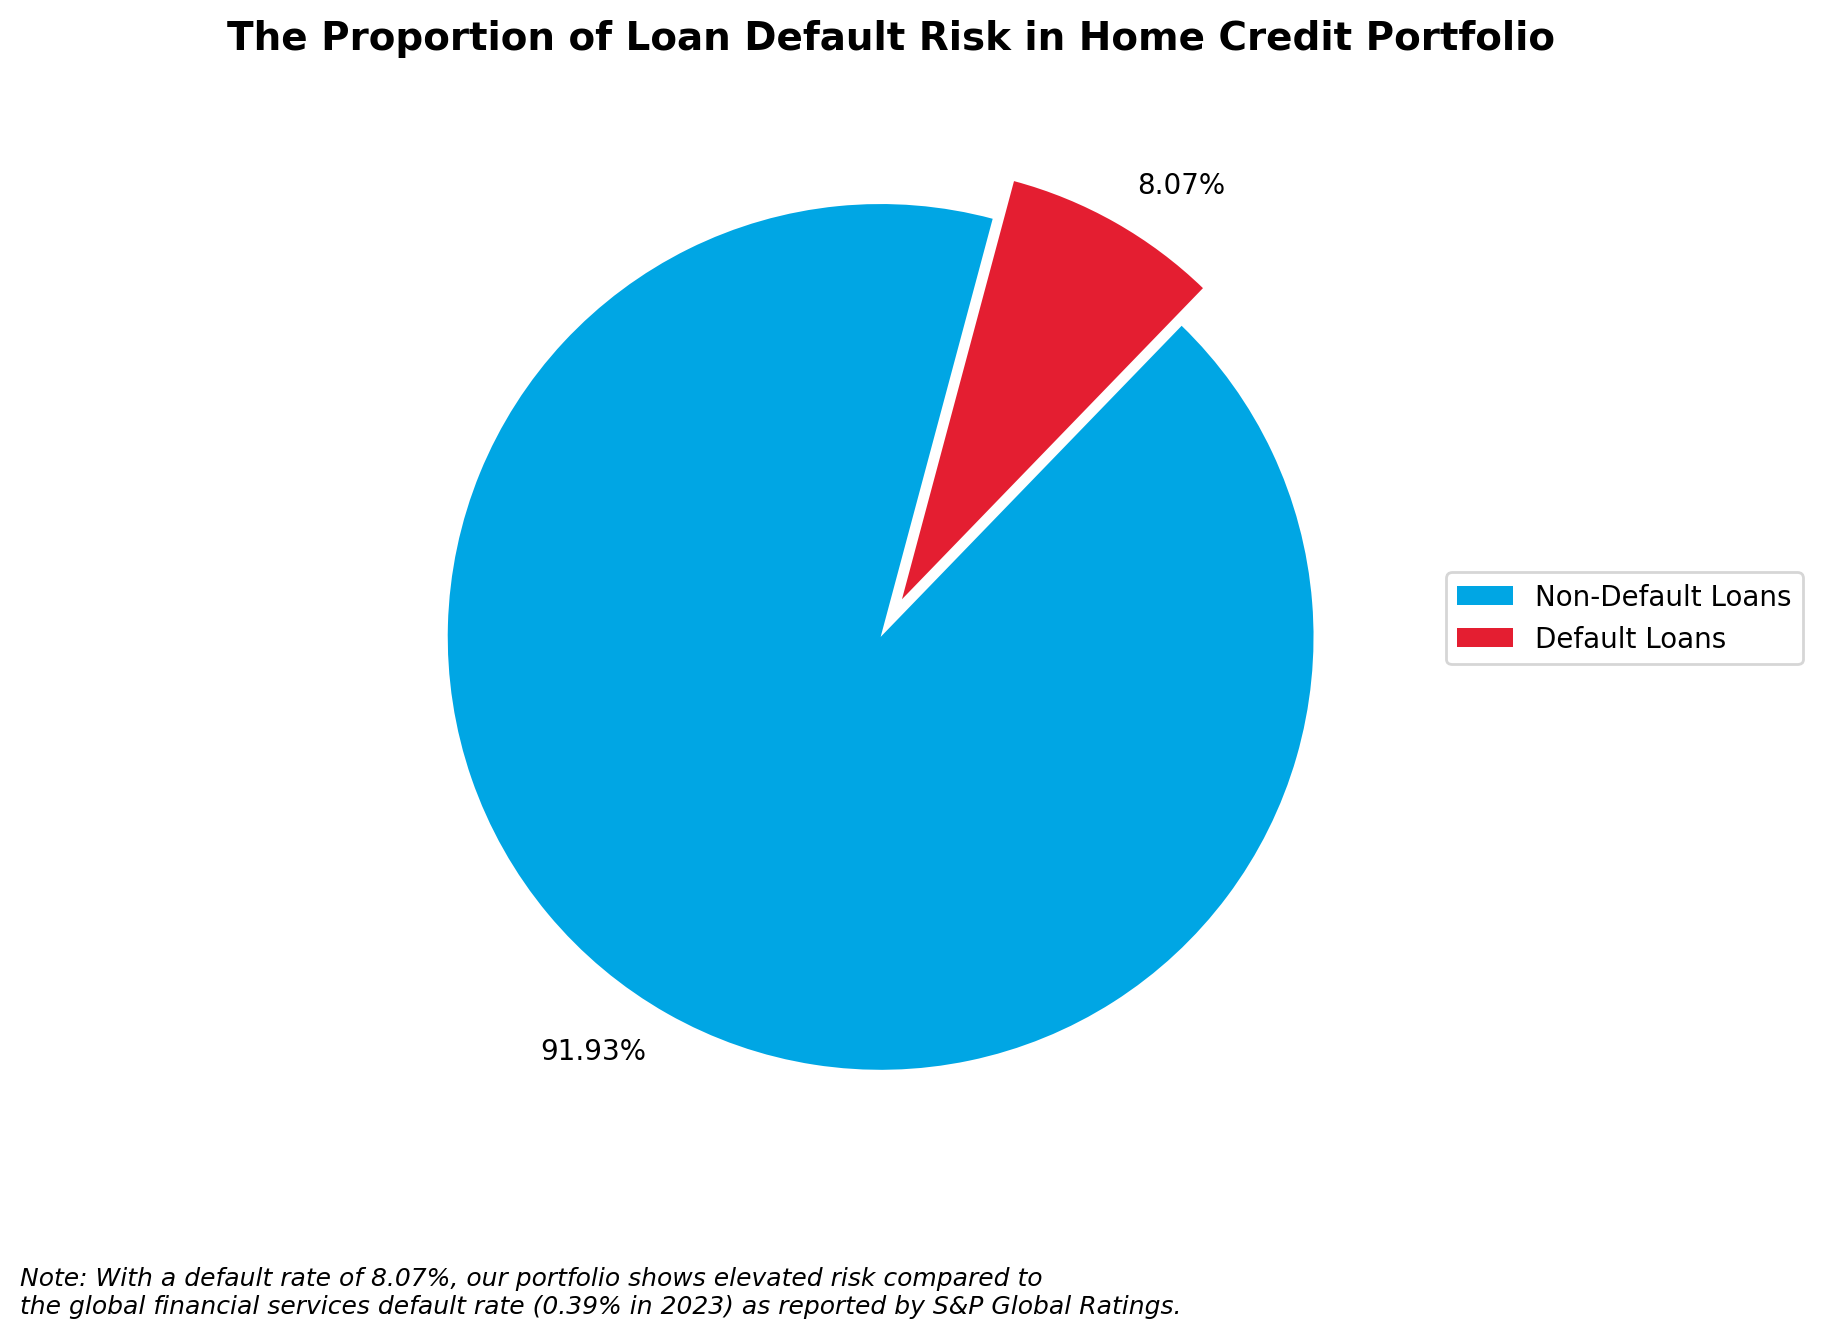

In [23]:
# Pie Chart label "TARGET"
target_counts = train['TARGET'].value_counts()
target_percentages = (target_counts / len(train) * 100).round(2)

plt.figure(figsize=(10, 6), dpi=200)
colors = ['#00A6E4', '#E41E31']
explode = (0.05, 0.05)

plt.pie(target_percentages, 
        explode=explode,
        labels=[f'{target_percentages[0]:.2f}%', f'{target_percentages[1]:.2f}%'],
        colors=colors,
        autopct='',
        startangle=75)

plt.title('The Proportion of Loan Default Risk in Home Credit Portfolio', 
          pad=10, fontsize=14,loc='center',fontweight='bold')
plt.legend(['Non-Default Loans', 'Default Loans'],
          loc='center left', bbox_to_anchor=(1, 0.5))
plt.figtext(0.05, -0.1, 
           f'Note: With a default rate of 8.07%, our portfolio shows elevated risk compared to\n'
           f'the global financial services default rate (0.39% in 2023) as reported by S&P Global Ratings.',
           wrap=True, fontsize=9, style='italic')


plt.tight_layout()
plt.show()


The data indicates that Home Credit has a default rate of 8.07%. According to S&P Global Ratings, the global default rate for financial services was 0.39% in 2023. This comparison suggests that Home Credit's portfolio carries a **higher risk**.

### How Client's Status Default Based On Client's Age?

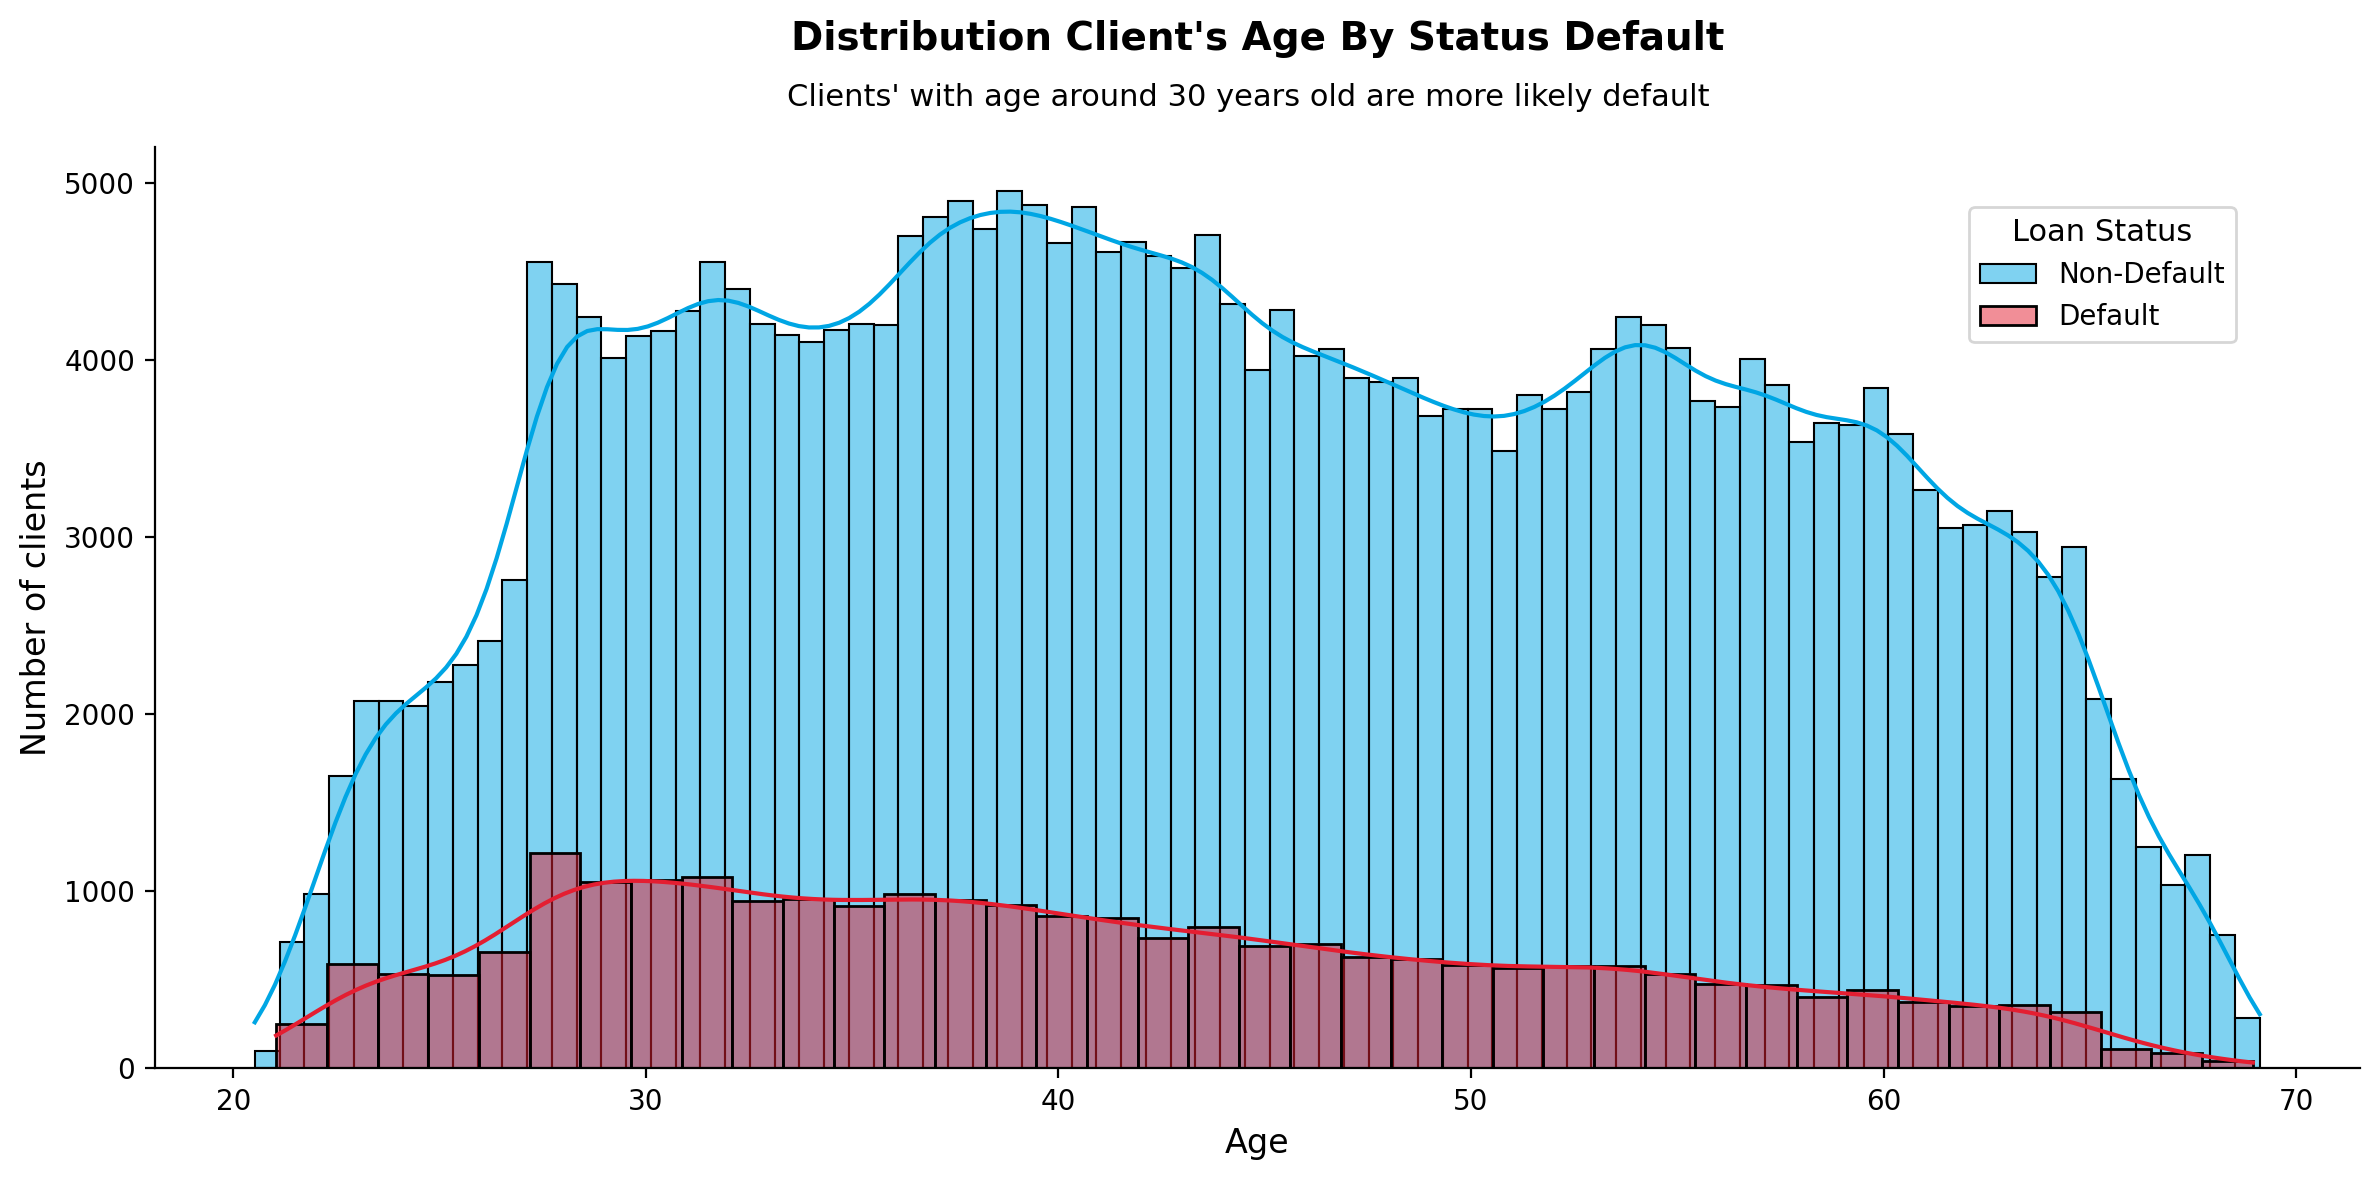

In [24]:
colors = ['#00A6E4', '#E41E31']  # Merah dan Biru Home Credit
train['AGE_YEARS'] = abs(train['DAYS_BIRTH'] / 365)

plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=train[train['TARGET']==0], x='AGE_YEARS', 
             color=colors[0], alpha=0.5, label='Non-Default', kde=True)
sns.histplot(data=train[train['TARGET']==1], x='AGE_YEARS', 
             color=colors[1], alpha=0.5, label='Default', kde=True)

plt.title("Distribution Client's Age By Status Default", 
          fontsize=14, fontweight='bold', pad=35)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of clients', fontsize=12)

plt.text(0.705, 1.07, "Clients' with age around 30 years old are more likely default", 
         transform=plt.gca().transAxes, 
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
         ha='right', va='top')

plt.legend(title='Loan Status', title_fontsize=11, 
          fontsize=10, loc='upper right', bbox_to_anchor=(0.95, 0.95))

sns.despine()
plt.tight_layout()
plt.show()


The data illustrates the distribution of clients' ages in relation to their loan default status. It shows that individuals around the age of 30 are more likely to default on loans. This trend suggests a higher risk of default among younger borrowers, indicating potential areas for targeted risk management strategies.

### How Client's Status Default based On Their Occupation?

In [25]:
train[train['OCCUPATION_TYPE'] == 'Medicine staff'][['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']]

,NAME_EDUCATION_TYPE,OCCUPATION_TYPE
47,Secondary / secondary special,Medicine staff
100,Secondary / secondary special,Medicine staff
127,Secondary / secondary special,Medicine staff
134,Secondary / secondary special,Medicine staff
197,Secondary / secondary special,Medicine staff
...,...,...
307408,Secondary / secondary special,Medicine staff
307419,Higher education,Medicine staff
307466,Secondary / secondary special,Medicine staff
307477,Higher education,Medicine staff


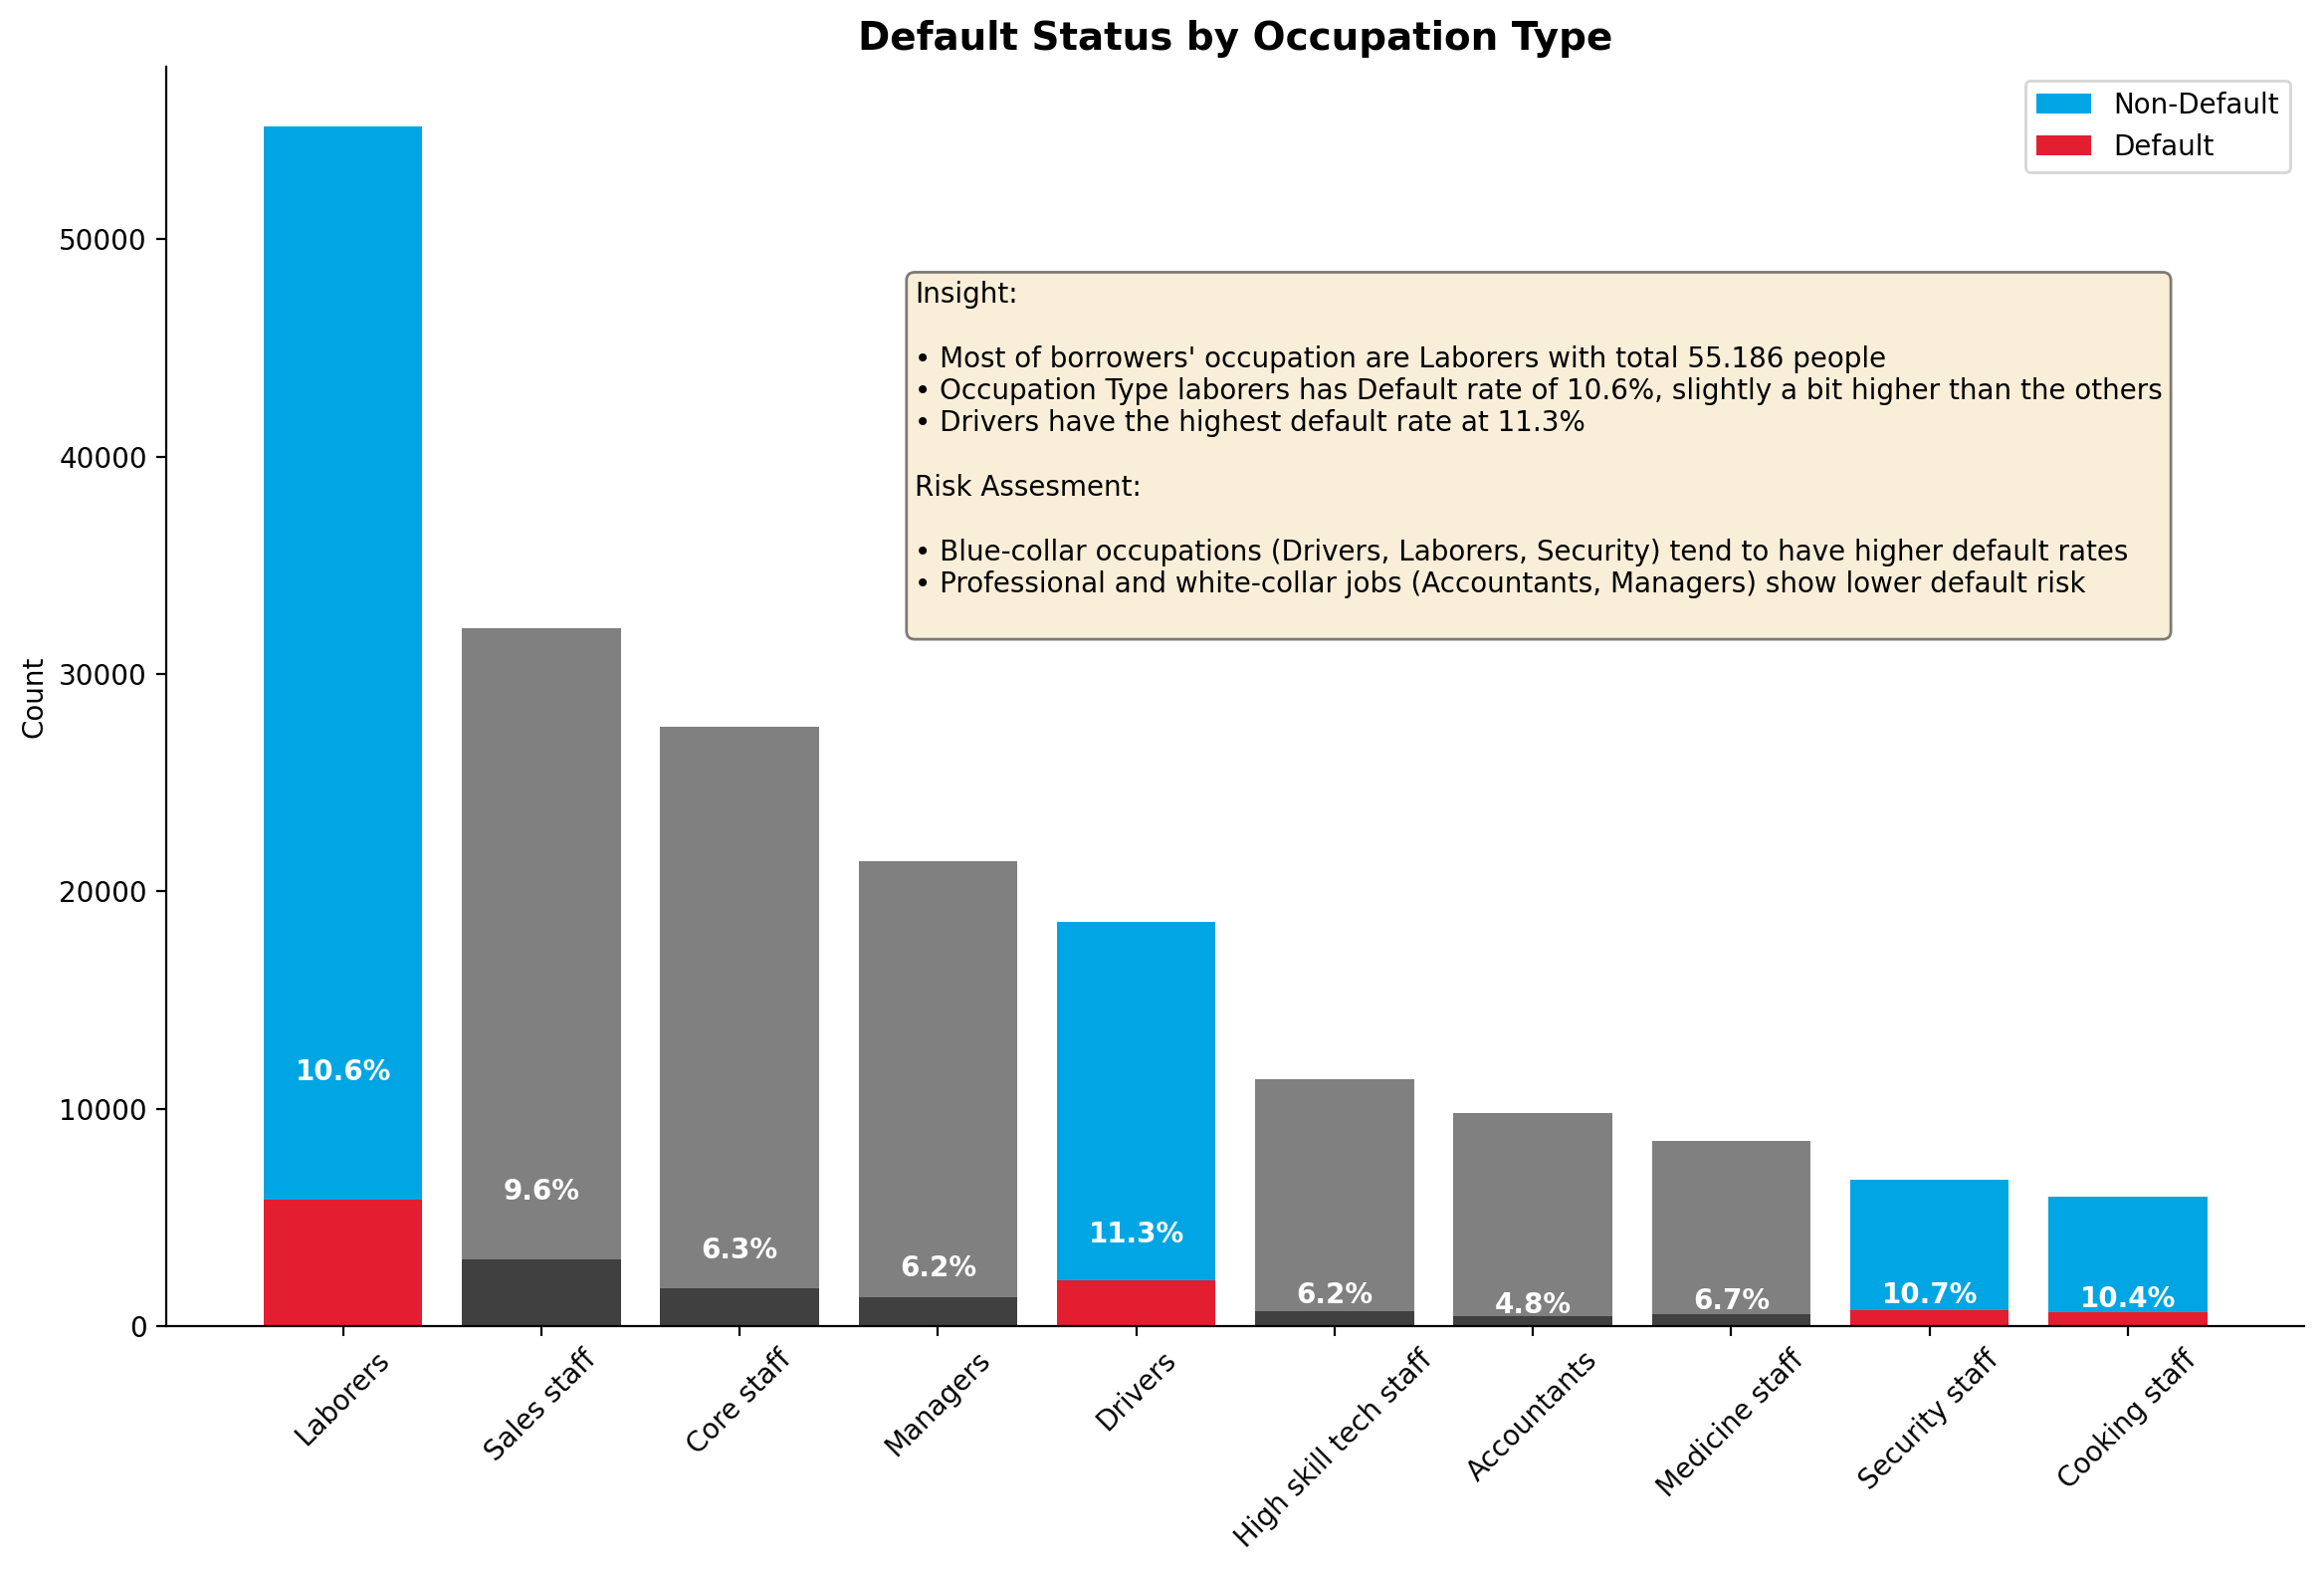

   OCCUPATION_TYPE  TARGET  total       Avg
8         Laborers    5838  55186  0.105788
14     Sales staff    3092  32102  0.096318
3       Core staff    1738  27570  0.063040
10        Managers    1328  21371  0.062140
4          Drivers    2107  18603  0.113261
          OCCUPATION_TYPE  TARGET  total       Avg
6   High skill tech staff     701  11380  0.061599
0             Accountants     474   9813  0.048303
11         Medicine staff     572   8537  0.067002
16         Security staff     722   6721  0.107424
2           Cooking staff     621   5946  0.104440


In [72]:
# Create temporary dataframe with aggregated values
temp = pd.DataFrame(train.groupby('OCCUPATION_TYPE')['TARGET'].agg(lambda x: x.eq(1).sum())).reset_index()
temp['total'] = pd.DataFrame(train.groupby('OCCUPATION_TYPE')['TARGET'].agg(total='count')).reset_index()['total']
temp['Avg'] = pd.DataFrame(train.groupby('OCCUPATION_TYPE')['TARGET'].agg(Avg='mean')).reset_index()['Avg']

# Sort values and get top 10
temp.sort_values(by=['total'], inplace=True, ascending=False)
temp = temp[:10]

# Define colors for the bars
colors_default = ['#E41E31', '#404040', '#404040', '#404040', '#E41E31', '#404040', '#404040', '#404040', '#E41E31', '#E41E31']
colors_non_default= ['#00A6E4', '#808080', '#808080', '#808080', '#00A6E4', '#808080', '#808080', '#808080', '#00A6E4', '#00A6E4']

# Create the plot
ind = np.arange(temp.shape[0])
# Create the plot
ind = np.arange(temp.shape[0])
plt.figure(figsize=(12,8), dpi=200)

# Create stacked bars
p1 = plt.bar(ind, temp['total'].values, color=colors_non_default)
p2 = plt.bar(ind, temp['TARGET'].values, color=colors_default)

# Add percentage labels for default portion
for i, v in enumerate(temp['TARGET'].values):
    percentage = (v / temp['total'].values[i]) * 100
    plt.text(i, v*2, f'{percentage:.1f}%', 
             ha='center', va='center', color='white', fontweight='bold', fontsize=10)

# Add description text
desc_text = (
    'Insight:\n\n'
    f"• Most of borrowers' occupation are Laborers with total 55.186 people\n"
    f'• Occupation Type laborers has Default rate of 10.6%, slightly a bit higher than the others\n'
    f'• Drivers have the highest default rate at 11.3%\n\n'
    'Risk Assesment:\n\n'
    f'• Blue-collar occupations (Drivers, Laborers, Security) tend to have higher default rates\n'
    f'• Professional and white-collar jobs (Accountants, Managers) show lower default risk\n'
)

# Add text box
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.35, 0.83, desc_text,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)

# Customize the plot
plt.ylabel('Count')
plt.title('Default Status by Occupation Type', fontsize=14, fontweight='bold')
plt.xticks(ticks=ind, rotation=45, labels=list(temp['OCCUPATION_TYPE'].values))
plt.legend((p1[0], p2[0]), ('Non-Default', 'Default'))

sns.despine()
plt.tight_layout()
plt.show()

# Print the data
print(temp.head(5))
print("="*50)
print(temp.tail(5))


The findings indicate that laborers form the largest group of borrowers, with a notable default rate of 10.6%, while drivers exhibit the highest default rate at 11.3%. This suggests that blue-collar occupations, including drivers, laborers, and security staff, are associated with higher financial risk. Conversely, professional and white-collar roles, such as accountants and managers, display lower default rates, indicating a more stable financial behavior. These insights emphasize the need for tailored risk management strategies, focusing on the unique financial characteristics associated with different occupational groups.

<Figure size 2400x1200 with 0 Axes>

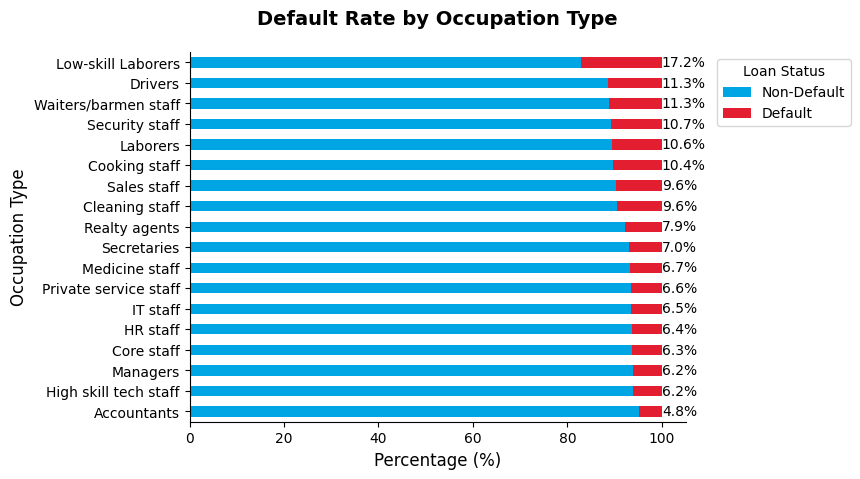

In [27]:
# Calculate default rate by occupation type
occupation_default = pd.crosstab(train['OCCUPATION_TYPE'], train['TARGET'], normalize='index') * 100
occupation_default = occupation_default.sort_values(by=1, ascending=True)  # Sort by default rate

# Plot bar chart
plt.figure(figsize=(12, 6), dpi=200)
occupation_default.plot(kind='barh', stacked=True, 
                       color=[colors[0], colors[1]]) 

# Arrange the layout
plt.title('Default Rate by Occupation Type', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Occupation Type', fontsize=12)

# Add text annotation
for i in range(len(occupation_default)):
    default_pct = occupation_default.iloc[i, 1]
    plt.text(100, i, f'{default_pct:.1f}%', 
             ha='left', va='center')

# Arrange the legend
plt.legend(['Non-Default', 'Default'], 
          title='Loan Status',
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')

sns.despine()
plt.show()


 Low-skill laborers exhibit the highest default rate at 17.2%, indicating substantial financial vulnerability. Similarly, drivers and waiters/barmen staff, both with an 11.3% default rate, demonstrate consistent risk patterns within the service and transport sectors. Comparatively, previous data also identified drivers as high-risk, reinforcing their elevated risk profile. Laborers consistently show high default rates across datasets, underscoring the need for targeted interventions. In contrast, accountants maintain the lowest default rate at 4.8%, confirming their stable financial behavior.

Strategic implications include focusing risk mitigation efforts on high-risk groups such as low-skill laborers and drivers, developing tailored financial products, and refining credit assessment models to incorporate occupational risk factors. This analysis highlights the necessity of occupation-specific risk management strategies to enhance loan portfolio stability.

### How Client's Status Default based On Their Ability to Pay the Loans?

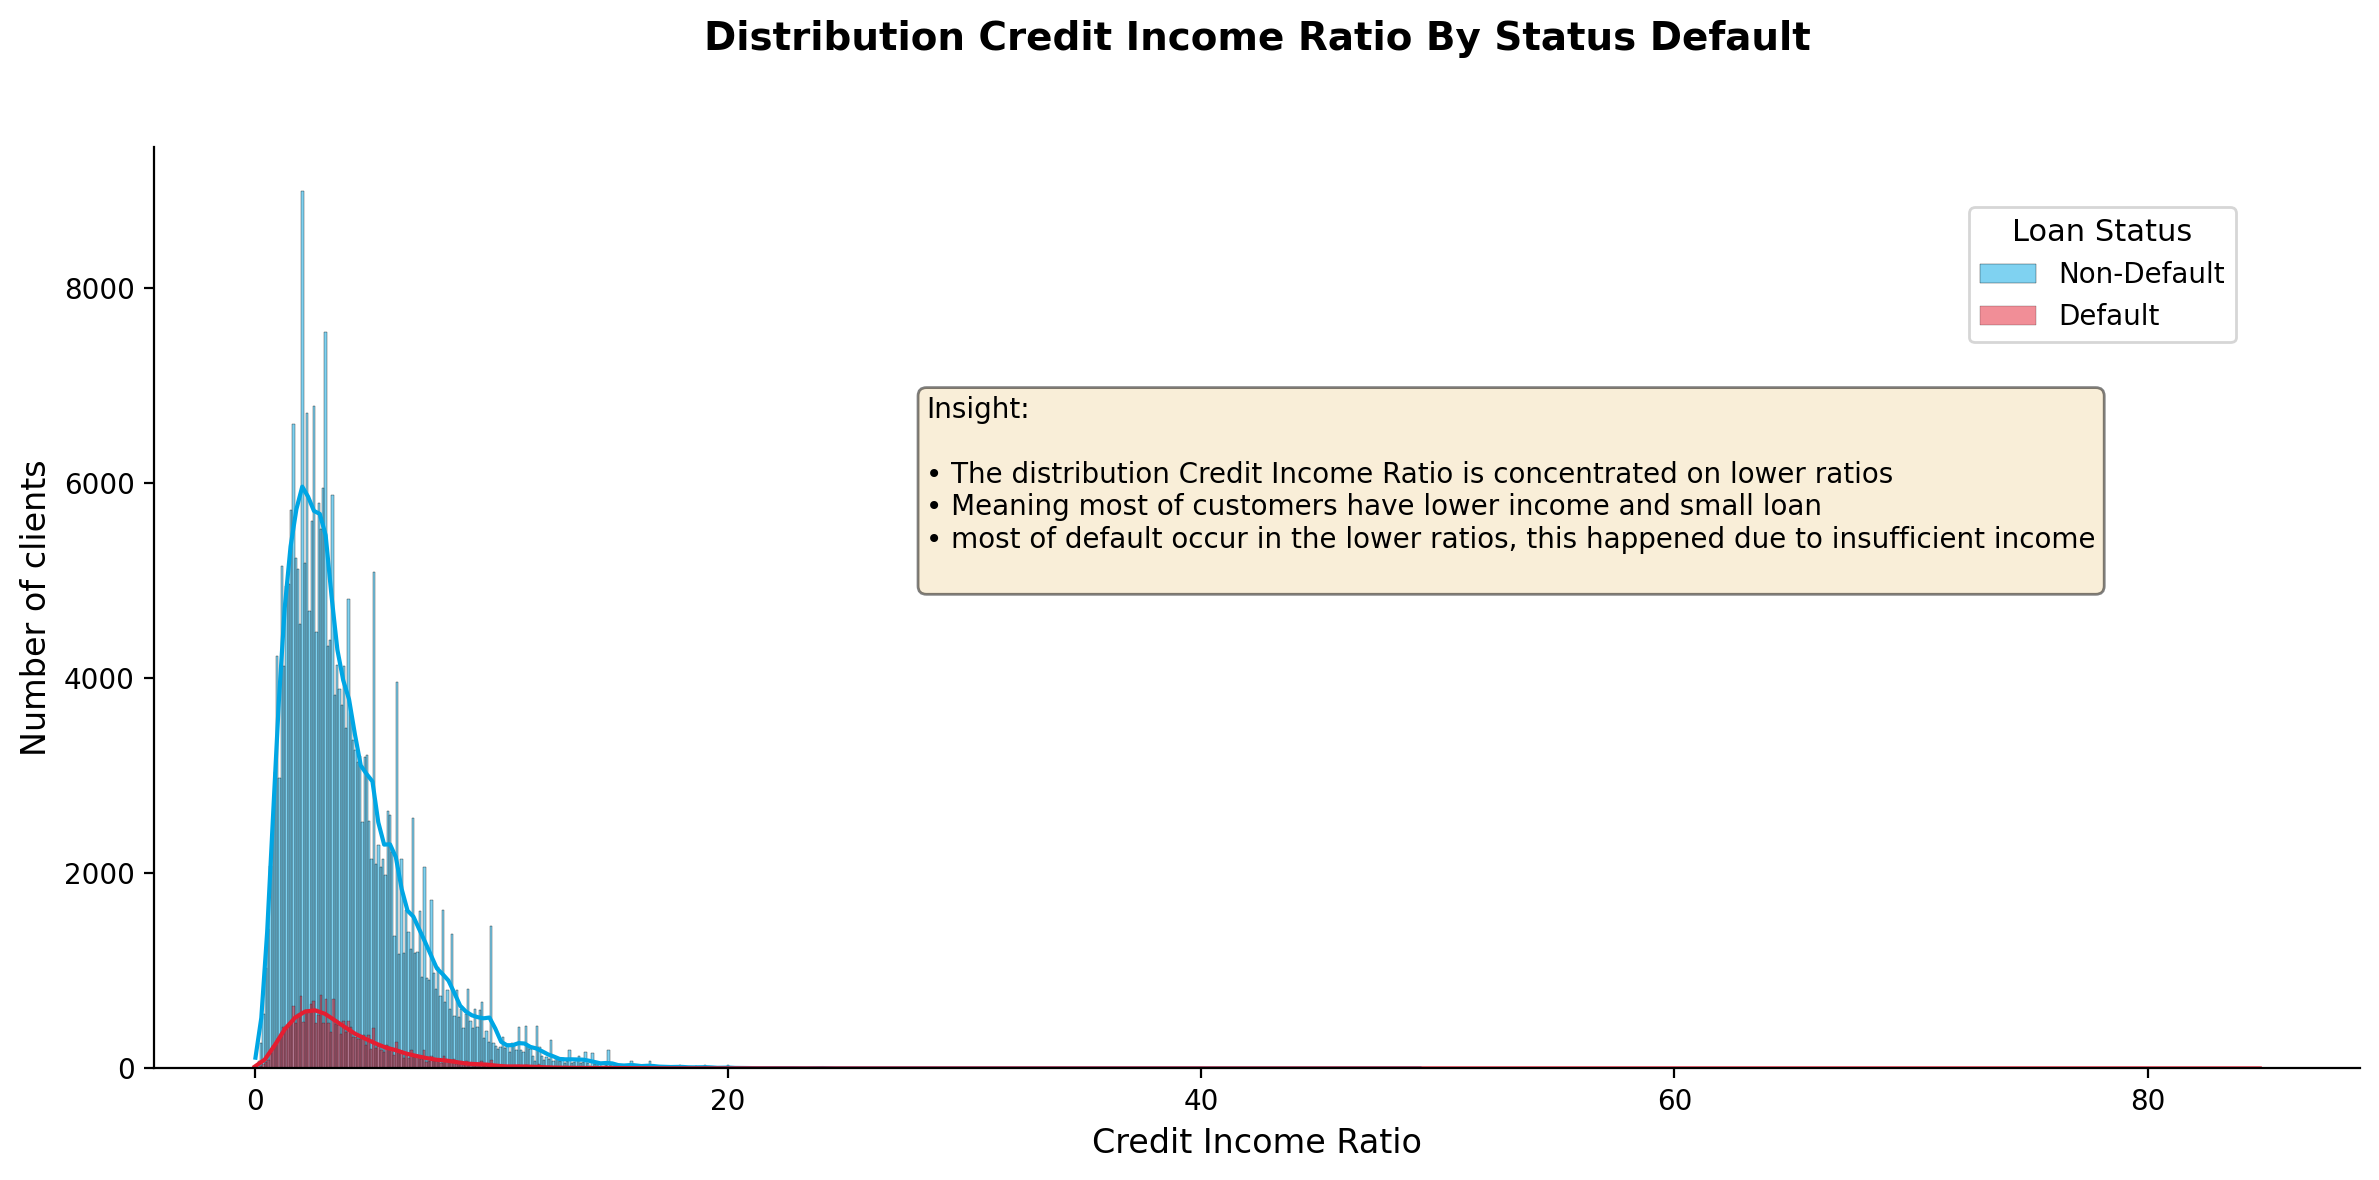

In [28]:
# Calculate default rate by occupation type
train['CREDIT_INCOME_RATIO'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']
colors = ['#00A6E4', '#E41E31']

# Plot the distribution
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=train[train['TARGET']==0], x='CREDIT_INCOME_RATIO', 
             color=colors[0], alpha=0.5, label='Non-Default', kde=True)
sns.histplot(data=train[train['TARGET']==1], x='CREDIT_INCOME_RATIO', 
             color=colors[1], alpha=0.5, label='Default', kde=True, bins=800)

# Customize the plot
plt.title("Distribution Credit Income Ratio By Status Default", 
          fontsize=14, fontweight='bold', pad=35)
plt.xlabel('Credit Income Ratio', fontsize=12)
plt.ylabel('Number of clients', fontsize=12)

# Add description text
desc_text = (
    'Insight:\n\n'
    f"• The distribution Credit Income Ratio is concentrated on lower ratios\n"
    f'• Meaning most of customers have lower income and small loan\n'
    f'• most of default occur in the lower ratios, this happened due to insufficient income\n'
)

# Add text box
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.35, 0.73, desc_text,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)

plt.legend(title='Loan Status', title_fontsize=11, 
          fontsize=10, loc='upper right', bbox_to_anchor=(0.95, 0.95))

sns.despine()
plt.tight_layout()
plt.show()



The image on the distribution of the credit income ratio by default status reveals that clients with higher credit income ratios tend to default more frequently. The distribution shows a concentration of defaults at lower credit income ratios, with a noticeable decline as the ratio increases. This suggests that while high credit exposure relative to income is a risk factor, most defaults occur at lower ratios, possibly due to insufficient income to manage even moderate credit levels. The insights emphasize the need for careful assessment of credit income ratios during loan evaluations, as well as the importance of providing financial guidance to clients with lower income to credit ratios to prevent defaults.

### How Client's Status Default based On Their Marital Status?

In [29]:
train['NAME_FAMILY_STATUS'].unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

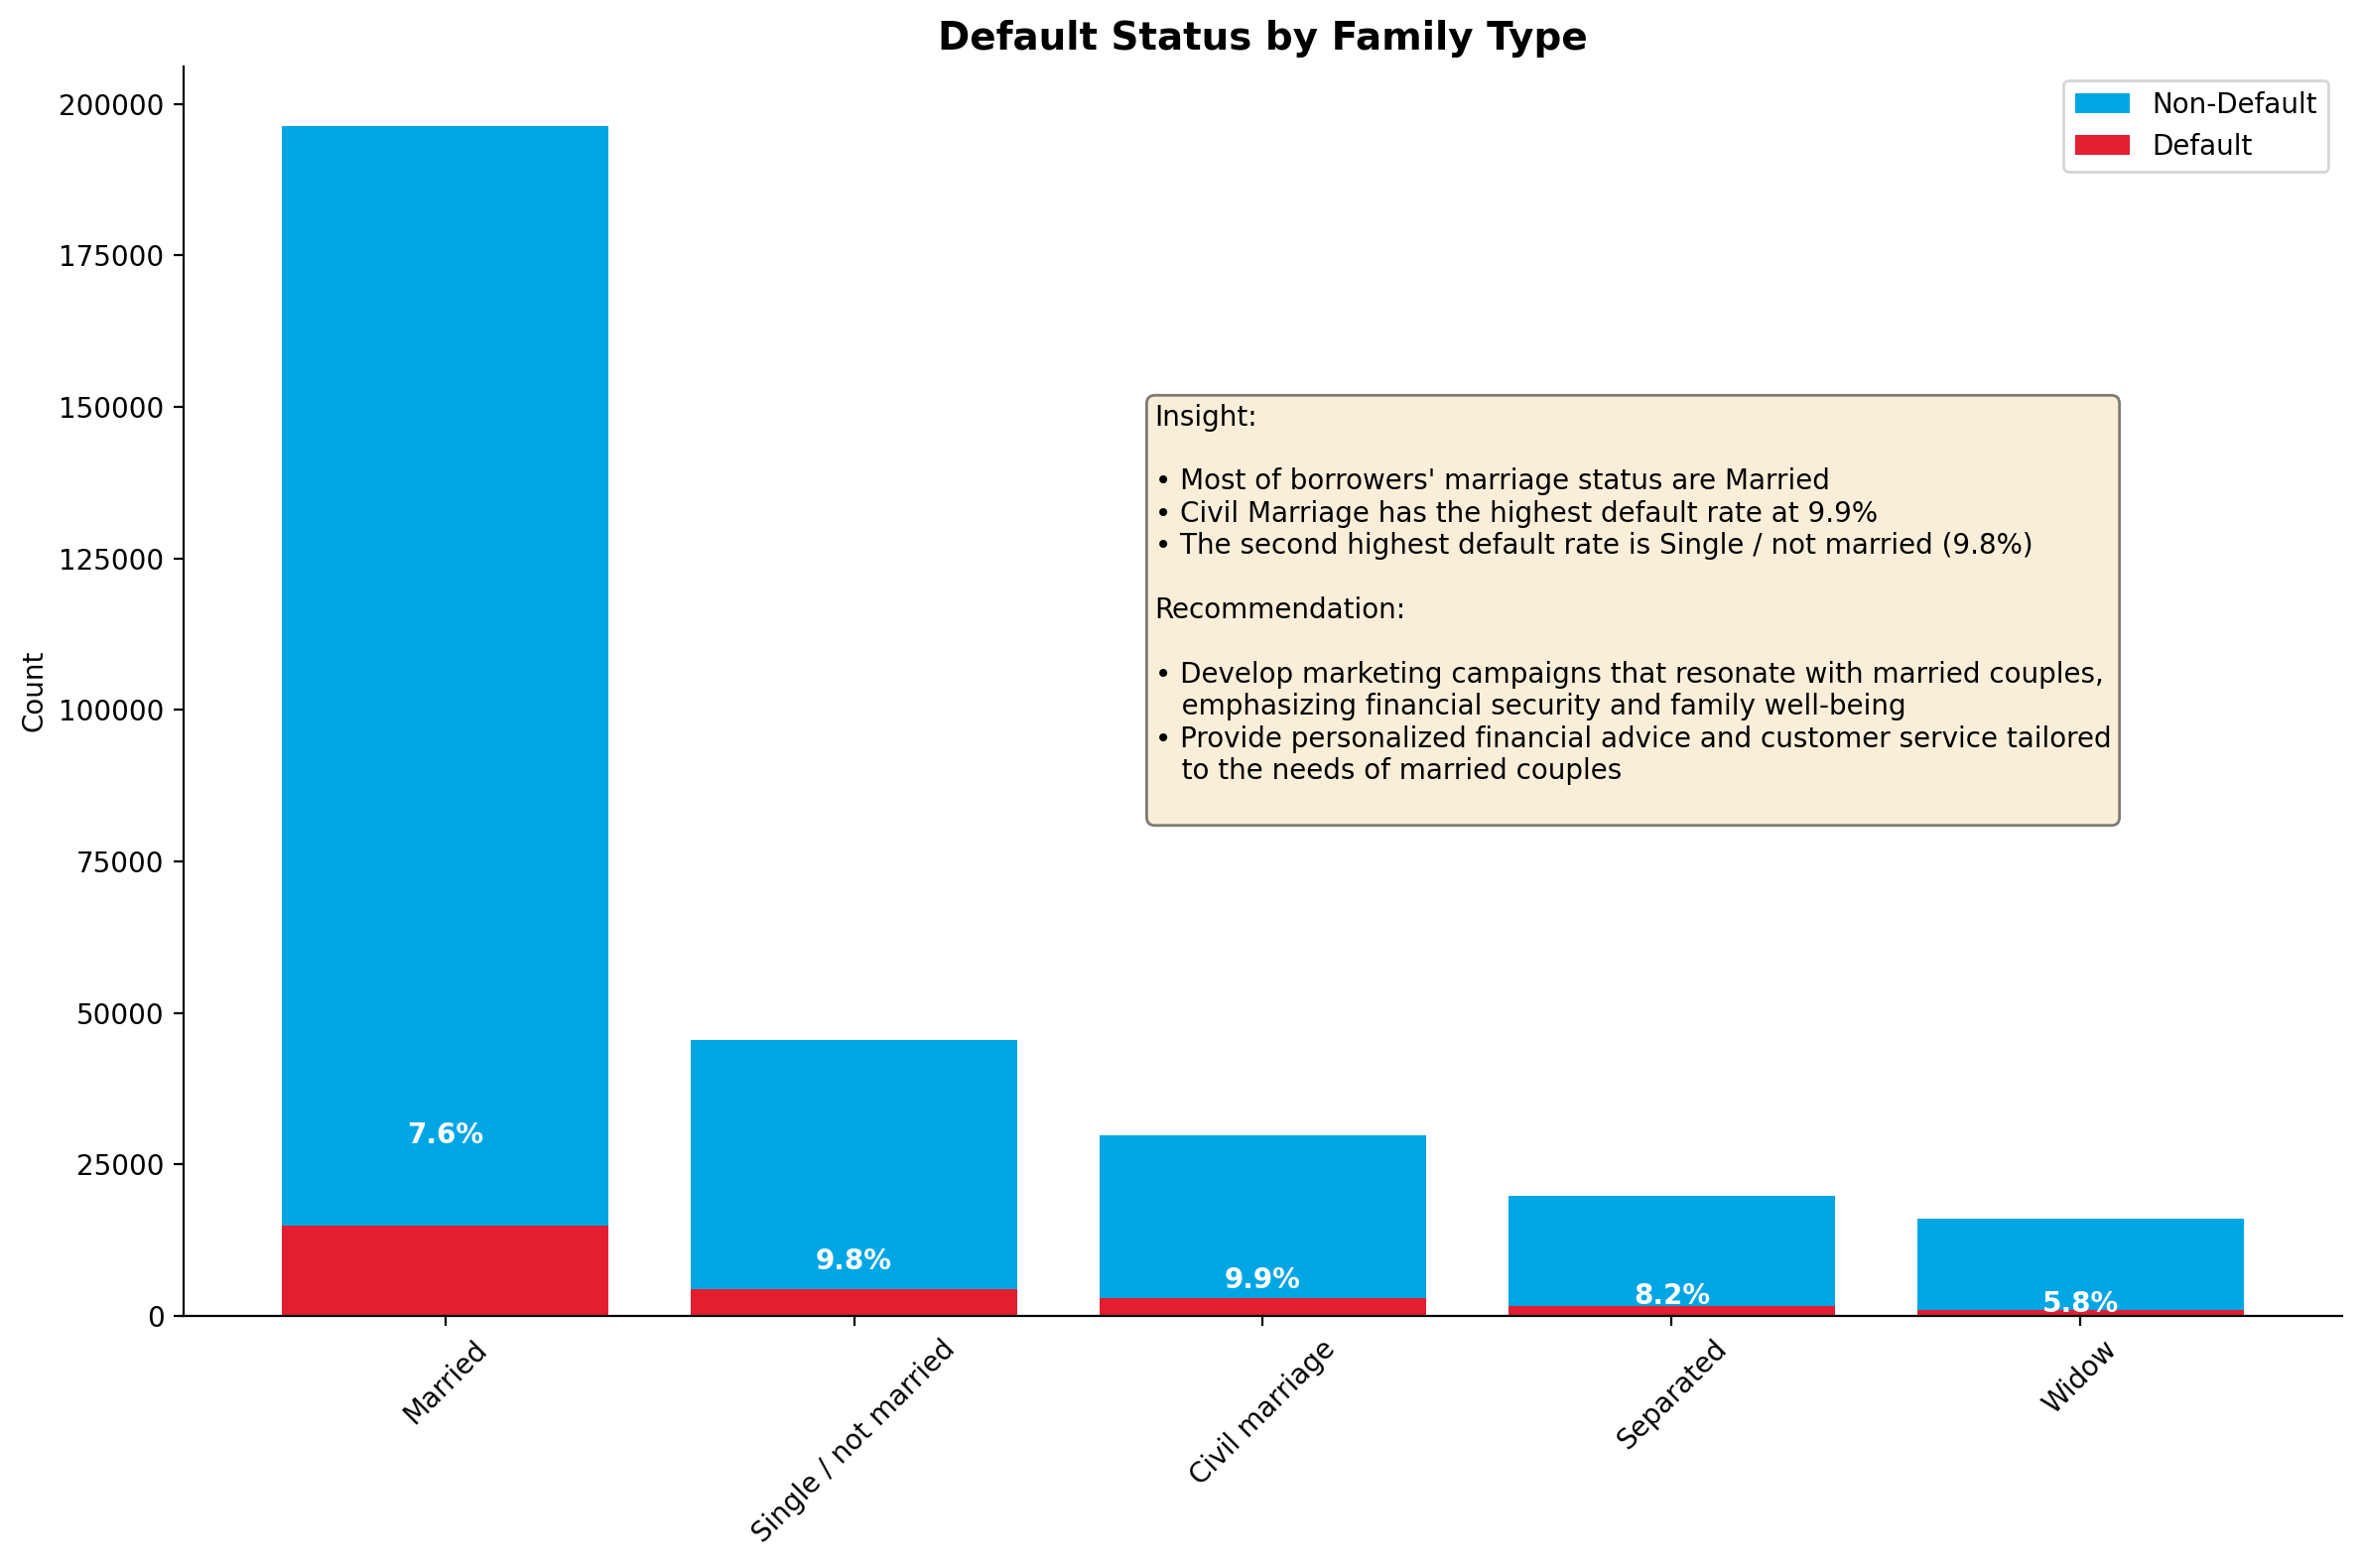

     NAME_FAMILY_STATUS  TARGET   total       Avg
1               Married   14850  196434  0.075598
3  Single / not married    4457   45444  0.098077
0        Civil marriage    2961   29775  0.099446
2             Separated    1620   19770  0.081942
4                 Widow     937   16088  0.058242


In [73]:
# Aggregate 'Unknown' into 'Married' category
temp_marriage = train.copy()
temp_marriage['NAME_FAMILY_STATUS'] = temp_marriage['NAME_FAMILY_STATUS'].map({'Married': 'Married', 'Single / not married':'Single / not married', 'Civil marriage':'Civil marriage',
                                                             'Widow':'Widow', 'Separated':'Separated', 'Unknown': 'Married'})
# Create temporary dataframe with aggregated values
temp = pd.DataFrame(temp_marriage.groupby('NAME_FAMILY_STATUS')['TARGET'].agg(lambda x: x.eq(1).sum())).reset_index()
temp['total'] = pd.DataFrame(temp_marriage.groupby('NAME_FAMILY_STATUS')['TARGET'].agg(total='count')).reset_index()['total']
temp['Avg'] = pd.DataFrame(temp_marriage.groupby('NAME_FAMILY_STATUS')['TARGET'].agg(Avg='mean')).reset_index()['Avg']

# Sort values 
temp.sort_values(by=['total'], inplace=True, ascending=False) 

# Define colors for the bars
colors_default = ['#E41E31', '#E41E31', '#E41E31', '#E41E31', '#E41E31']
colors_non_default= ['#00A6E4', '#00A6E4', '#00A6E4', '#00A6E4', '#00A6E4']

# Create the plot
ind = np.arange(temp.shape[0])
# Create the plot
ind = np.arange(temp.shape[0])
plt.figure(figsize=(12,8), dpi=200)

# Create stacked bars
p1 = plt.bar(ind, temp['total'].values, color=colors_non_default)
p2 = plt.bar(ind, temp['TARGET'].values, color=colors_default)

# Add percentage labels for default portion
for i, v in enumerate(temp['TARGET'].values):
    percentage = (v / temp['total'].values[i]) * 100
    plt.text(i, v*2, f'{percentage:.1f}%', 
             ha='center', va='center', color='white', fontweight='bold', fontsize=10)

# Add description text
desc_text = (
    'Insight:\n\n'
    f"• Most of borrowers' marriage status are Married\n"
    f'• Civil Marriage has the highest default rate at 9.9%\n'
    f'• The second highest default rate is Single / not married (9.8%)\n\n'
    'Recommendation:\n\n'
    f'• Develop marketing campaigns that resonate with married couples,\n   emphasizing financial security and family well-being\n'
    f'• Provide personalized financial advice and customer service tailored\n   to the needs of married couples\n'
)

# Add text box
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.45, 0.73, desc_text,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)

# Customize the plot
plt.ylabel('Count')
plt.title('Default Status by Family Type', fontsize=14, fontweight='bold')
plt.xticks(ticks=ind, rotation=45, labels=list(temp['NAME_FAMILY_STATUS'].values))
plt.legend((p1[0], p2[0]), ('Non-Default', 'Default'))

sns.despine()
plt.tight_layout()
plt.show()

# Print the data
print(temp.head(5))



The analysis of default rates by family type reveals key insights. Borrowers who are married form the largest group, with a default rate of 7.6%. Civil marriages exhibit the highest default rate at 9.9%, followed closely by singles or those not married at 9.8%. These findings suggest a need for targeted financial education programs aimed at individuals in civil marriages and singles to enhance their financial management skills. Additionally, integrating marital status into credit risk assessments could improve the accuracy of default predictions. Developing customized financial products with flexible repayment options for high-risk groups may further help mitigate default rates.

<Figure size 2400x1200 with 0 Axes>

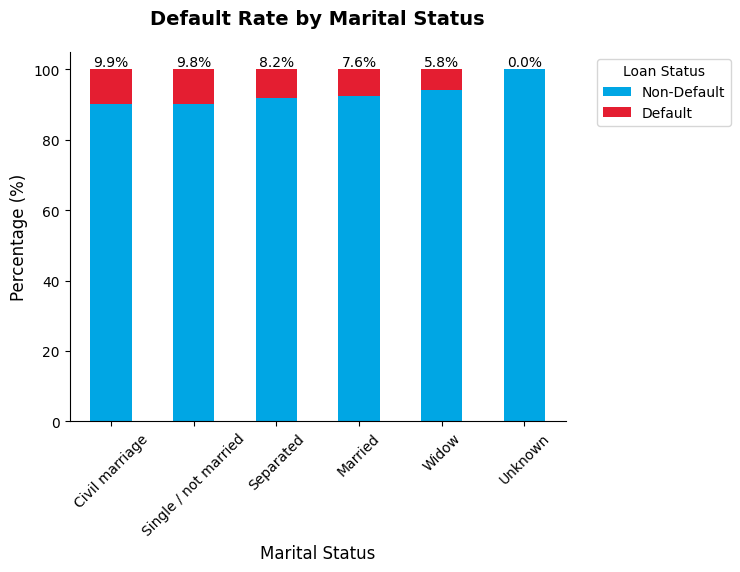

In [31]:
marital_default = pd.crosstab(train['NAME_FAMILY_STATUS'], train['TARGET'], normalize='index') * 100
marital_default = marital_default.sort_values(by=1, ascending=False)

plt.figure(figsize=(12, 6), dpi=200)
marital_default.plot(kind='bar', stacked=True, 
                    color=[colors[0], colors[1]])

plt.title('Default Rate by Marital Status', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

for i in range(len(marital_default)):
    default_pct = marital_default.iloc[i, 1]
    plt.text(i, 100, f'{default_pct:.1f}%', 
             ha='center', va='bottom')

plt.legend(['Non-Default', 'Default'], 
          title='Loan Status',
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')

plt.xticks(rotation=45)
sns.despine()
plt.show()


### How Client's Status Default based On Their Contract Type?

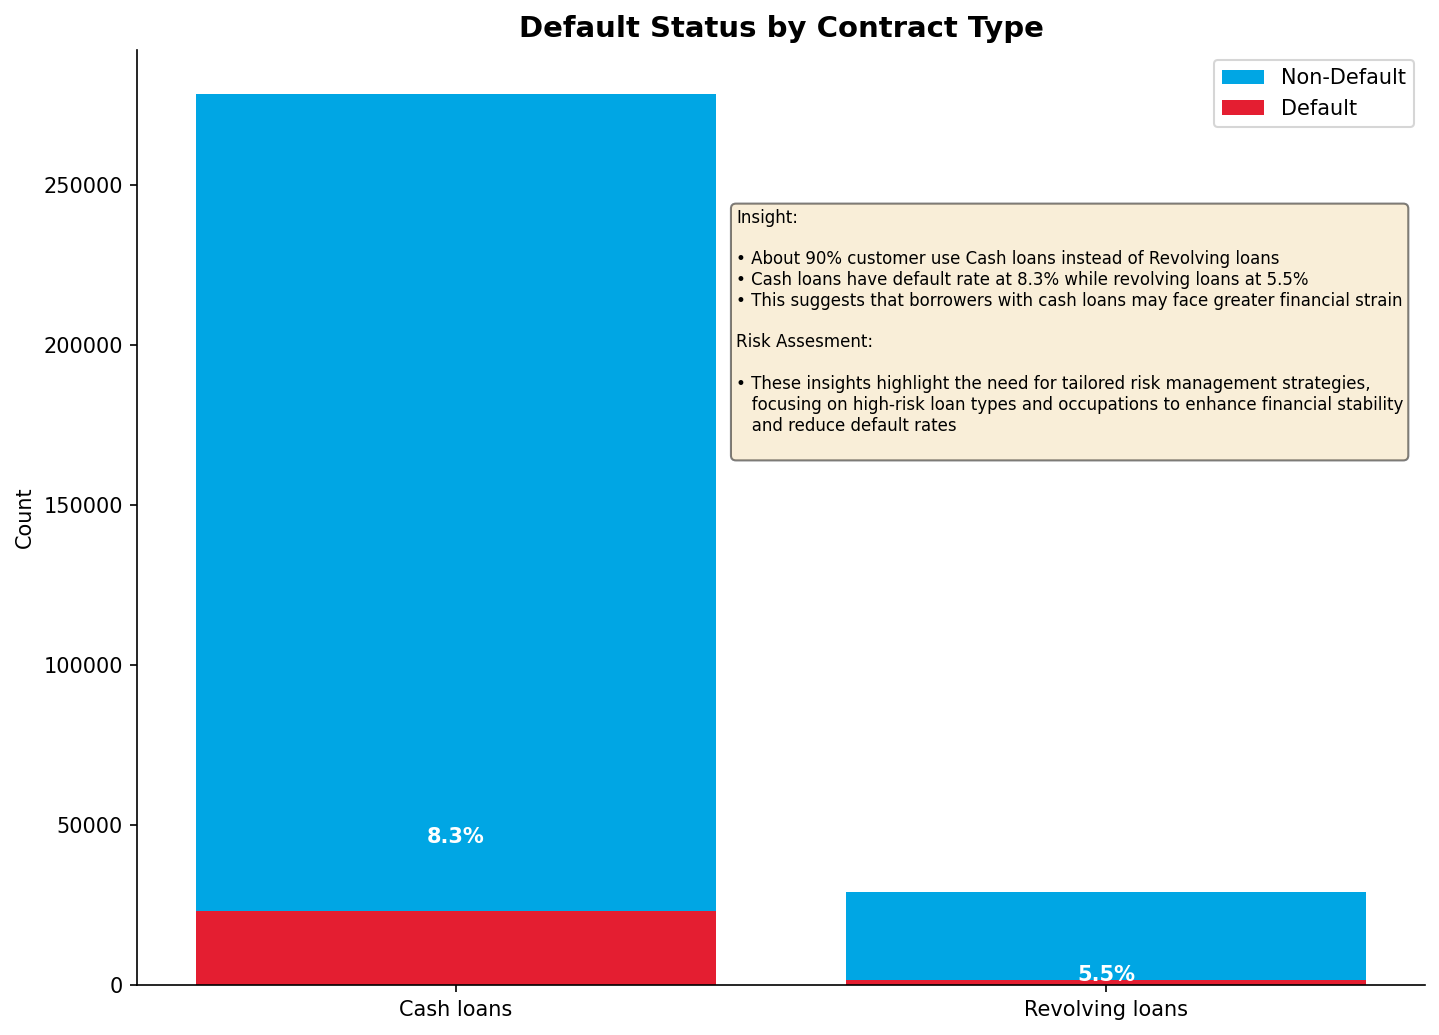

  NAME_CONTRACT_TYPE  TARGET   total       Avg
0         Cash loans   23221  278232  0.083459
1    Revolving loans    1604   29279  0.054783


In [77]:
# Create temporary dataframe with aggregated values
temp = pd.DataFrame(train.groupby('NAME_CONTRACT_TYPE')['TARGET'].agg(lambda x: x.eq(1).sum())).reset_index()
temp['total'] = pd.DataFrame(train.groupby('NAME_CONTRACT_TYPE')['TARGET'].agg(total='count')).reset_index()['total']
temp['Avg'] = pd.DataFrame(train.groupby('NAME_CONTRACT_TYPE')['TARGET'].agg(Avg='mean')).reset_index()['Avg']

# Sort values 
temp.sort_values(by=['total'], inplace=True, ascending=False)

# Define colors for the bars
colors_default = ['#E41E31', '#E41E31']
colors_non_default= ['#00A6E4', '#00A6E4']

# Create the plot
ind = np.arange(temp.shape[0])
# Create the plot
ind = np.arange(temp.shape[0])
plt.figure(figsize=(10,7), dpi=150)

# Create stacked bars
p1 = plt.bar(ind, temp['total'].values, color=colors_non_default)
p2 = plt.bar(ind, temp['TARGET'].values, color=colors_default)

# Add percentage labels for default portion
for i, v in enumerate(temp['TARGET'].values):
    percentage = (v / temp['total'].values[i]) * 100
    plt.text(i, v*2, f'{percentage:.1f}%', 
             ha='center', va='center', color='white', fontweight='bold', fontsize=10)

# Add description text
desc_text = (
    'Insight:\n\n'
    f"• About 90% customer use Cash loans instead of Revolving loans\n"
    f'• Cash loans have default rate at 8.3% while revolving loans at 5.5%\n'
    f'• This suggests that borrowers with cash loans may face greater financial strain\n\n'
    'Risk Assesment:\n\n'
    f'• These insights highlight the need for tailored risk management strategies,\n'
    f'   focusing on high-risk loan types and occupations to enhance financial stability\n   and reduce default rates\n'
)

# Add text box
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.465, 0.83, desc_text,
         transform=plt.gca().transAxes,
         fontsize=8,
         verticalalignment='top',
         bbox=props)

# Customize the plot
plt.ylabel('Count')
plt.title('Default Status by Contract Type', fontsize=14, fontweight='bold')
plt.xticks(ticks=ind, rotation=0, labels=list(temp['NAME_CONTRACT_TYPE'].values))
plt.legend((p1[0], p2[0]), ('Non-Default', 'Default'))

sns.despine()
plt.tight_layout()
plt.show()

# Print the data
print(temp.head(5))


<Figure size 2400x1200 with 0 Axes>

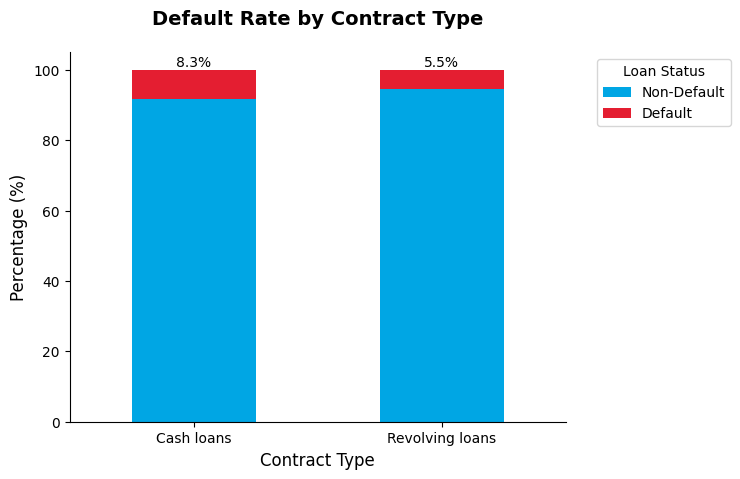

In [33]:
# Hitung persentase default rate untuk tipe kontrak
contract_default = pd.crosstab(train['NAME_CONTRACT_TYPE'], train['TARGET'], normalize='index') * 100
contract_default = contract_default.sort_values(by=1, ascending=False)  # Sort berdasarkan default rate

# Buat plot
plt.figure(figsize=(12, 6), dpi=200)
contract_default.plot(kind='bar', stacked=True, 
                     color=[colors[0], colors[1]])

# Atur judul dan label
plt.title('Default Rate by Contract Type', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Tambahkan persentase di atas setiap bar
for i in range(len(contract_default)):
    default_pct = contract_default.iloc[i, 1]
    plt.text(i, 100, f'{default_pct:.1f}%', 
             ha='center', va='bottom')

# Atur legend
plt.legend(['Non-Default', 'Default'], 
          title='Loan Status',
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')

plt.xticks(rotation=0)
sns.despine()
plt.show()


The analysis of default status by loan type reveals distinct risk patterns. Cash loans exhibit a higher default rate of 8.3% compared to revolving loans at 5.5%. This suggests that borrowers with cash loans may face greater financial strain. Additionally, blue-collar occupations, such as drivers and laborers, demonstrate elevated default rates, with drivers reaching 11.3%. In contrast, professional and white-collar roles, like accountants and managers, show lower default risks. These insights highlight the need for tailored risk management strategies, focusing on high-risk loan types and occupations to enhance financial stability and reduce default rates.

### How Client's Status Default based On Their Last Education?

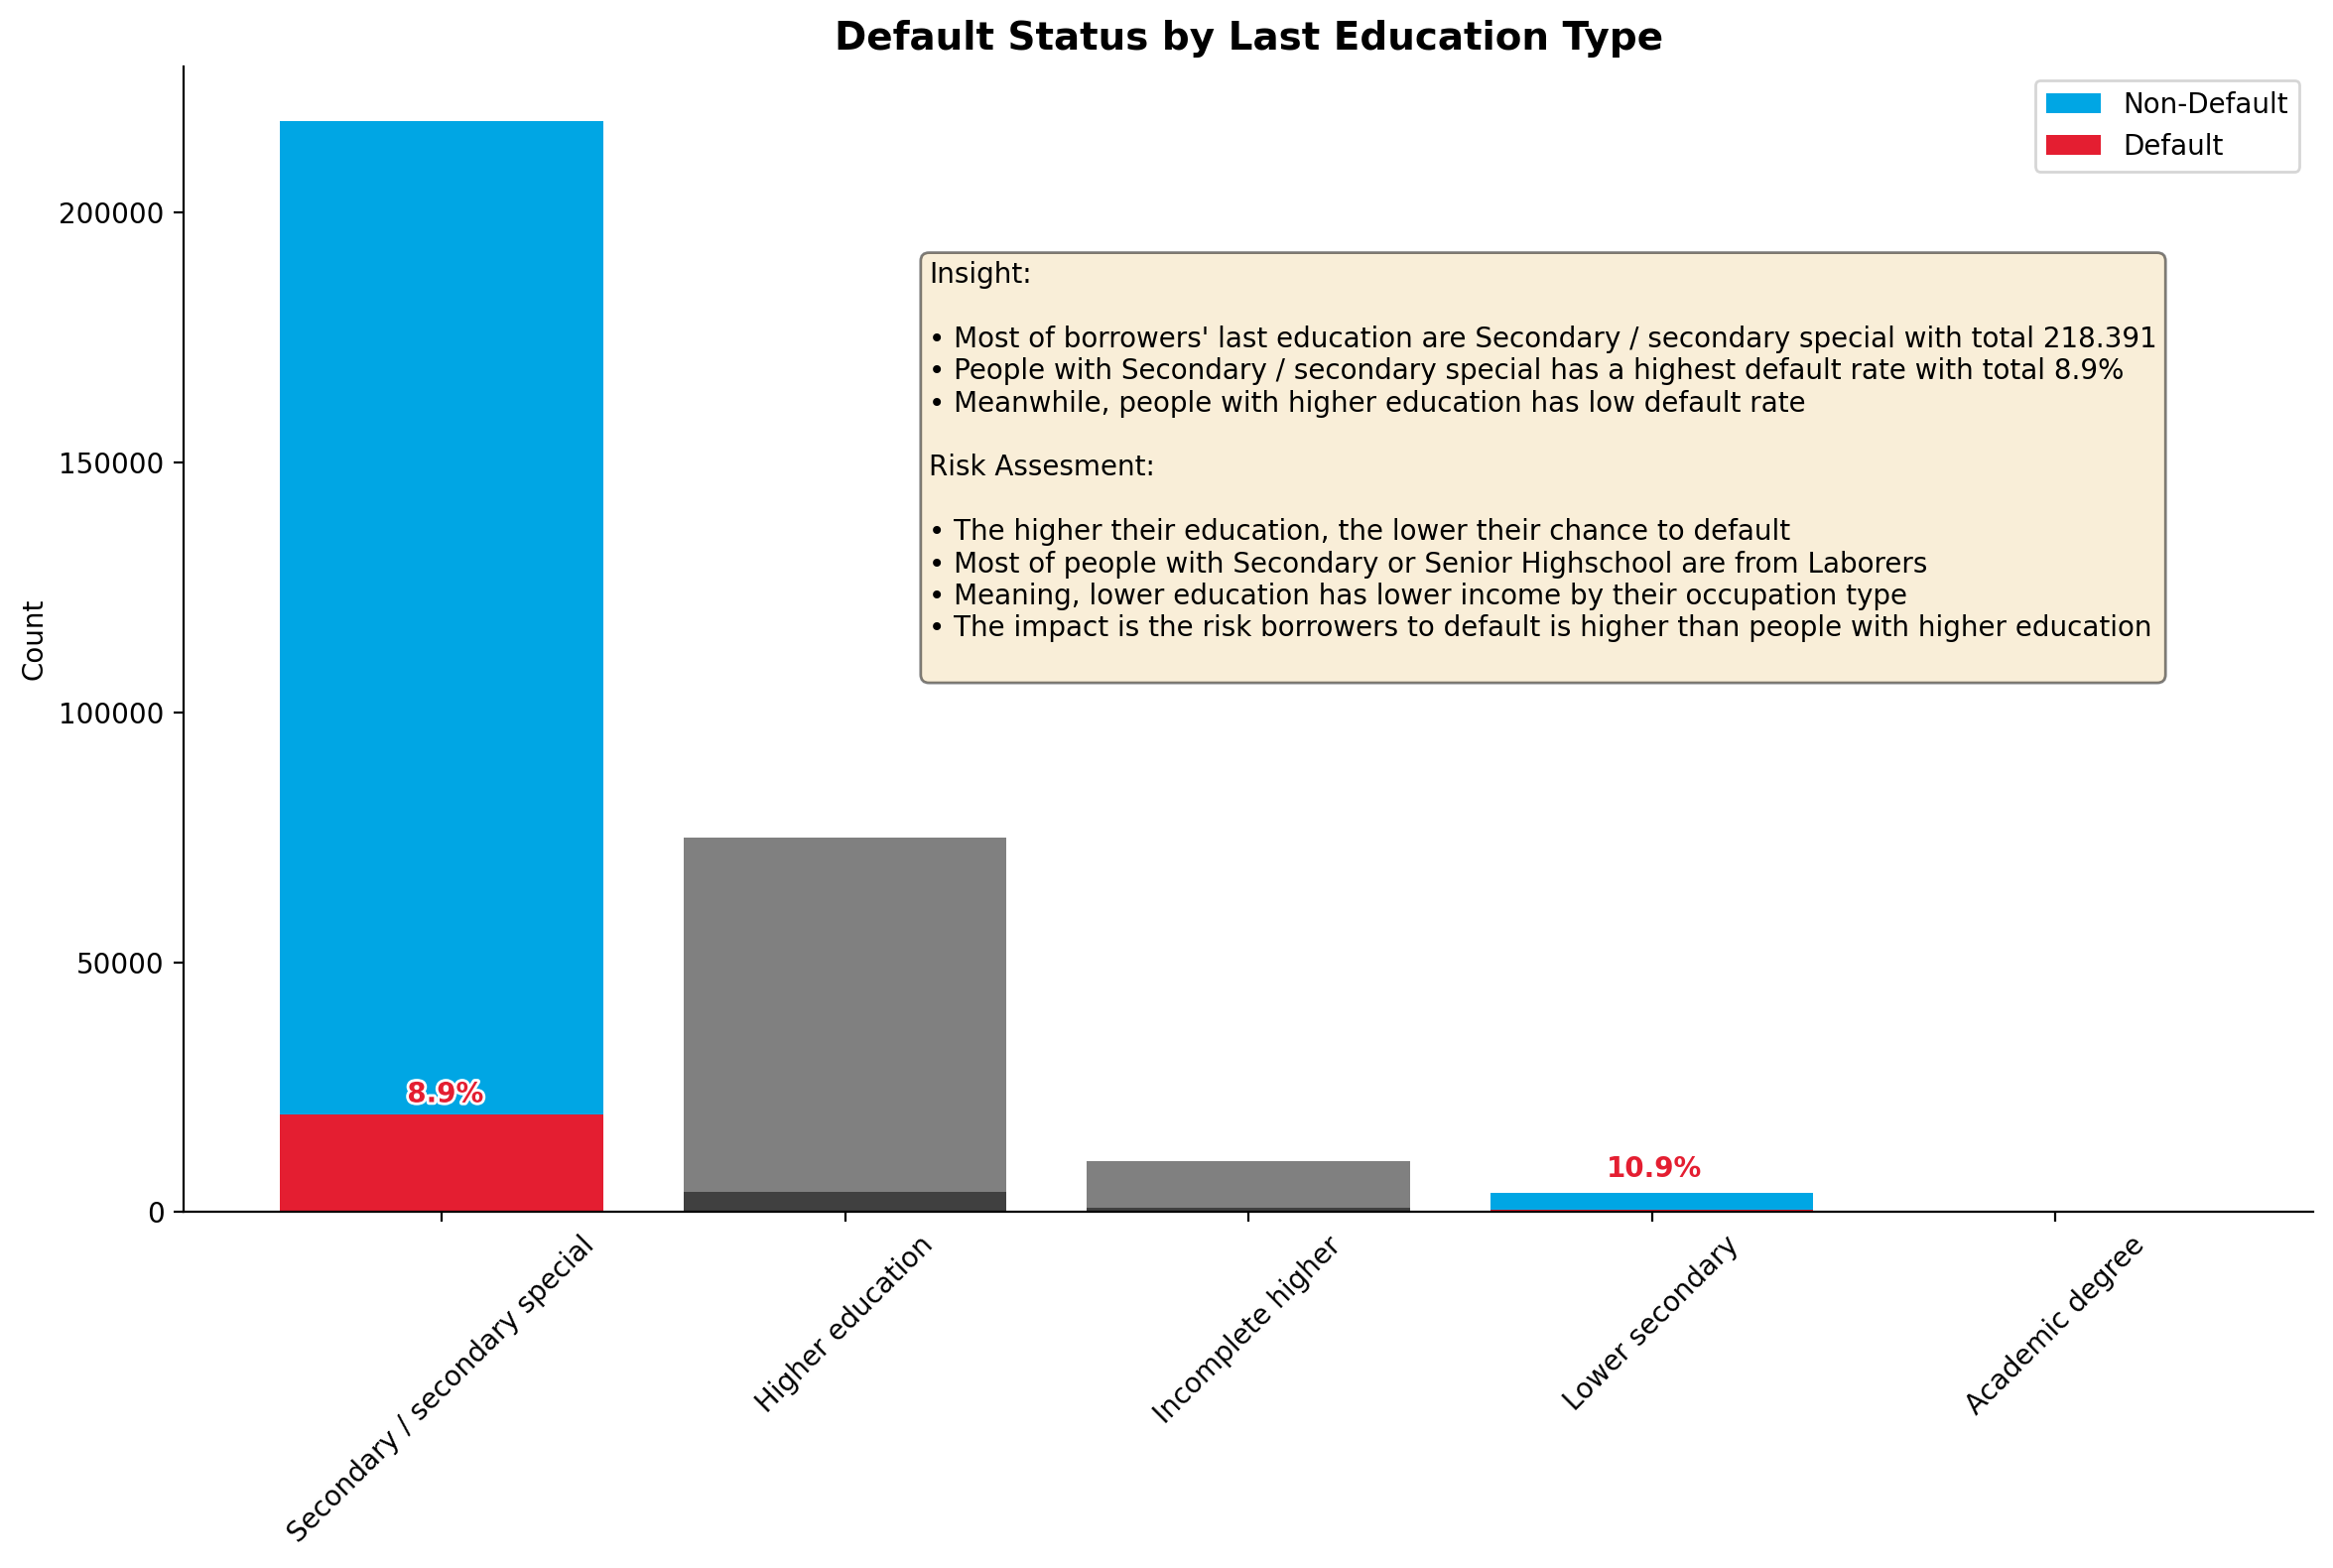

             NAME_EDUCATION_TYPE  TARGET   total       Avg
4  Secondary / secondary special   19524  218391  0.089399
1               Higher education    4009   74863  0.053551
2              Incomplete higher     872   10277  0.084850
3                Lower secondary     417    3816  0.109277
0                Academic degree       3     164  0.018293
             NAME_EDUCATION_TYPE  TARGET   total       Avg
4  Secondary / secondary special   19524  218391  0.089399
1               Higher education    4009   74863  0.053551
2              Incomplete higher     872   10277  0.084850
3                Lower secondary     417    3816  0.109277
0                Academic degree       3     164  0.018293


In [79]:
import matplotlib.patheffects as path_effects

# Create temporary dataframe with aggregated values
temp = pd.DataFrame(train.groupby('NAME_EDUCATION_TYPE')['TARGET'].agg(lambda x: x.eq(1).sum())).reset_index()
temp['total'] = pd.DataFrame(train.groupby('NAME_EDUCATION_TYPE')['TARGET'].agg(total='count')).reset_index()['total']
temp['Avg'] = pd.DataFrame(train.groupby('NAME_EDUCATION_TYPE')['TARGET'].agg(Avg='mean')).reset_index()['Avg']

# Sort values and get top 10
temp.sort_values(by=['total'], inplace=True, ascending=False)

# Define colors for the bars
colors_default = ['#E41E31', '#404040', '#404040', '#E41E31', '#404040']
colors_non_default= ['#00A6E4', '#808080',  '#808080', '#00A6E4', '#808080']

# Create the plot
ind = np.arange(temp.shape[0])
plt.figure(figsize=(12,8), dpi=200)

# Create stacked bars with different colors
p1 = plt.bar(ind, temp['total'].values, color= colors_non_default)
p2 = plt.bar(ind, temp['TARGET'].values, color= colors_default)

secondary_ed = ('8.9%')
txt_secondary_ed = plt.text(0.105, 0.115, secondary_ed,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         fontweight='bold',
         color='#E41E31') 

txt_secondary_ed.set_path_effects([
    path_effects.withStroke(linewidth=2, foreground='white')
    ])

lower_secondary_ed = ('10.9%')
plt.text(0.668, 0.05, lower_secondary_ed,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         fontweight='bold',
         color='#E41E31') 
        
# Menambahkan box deskripsi
desc_text = (
    'Insight:\n\n'
    f"• Most of borrowers' last education are Secondary / secondary special with total 218.391\n"
    f'• People with Secondary / secondary special has a highest default rate with total 8.9%\n'
    f'• Meanwhile, people with higher education has low default rate\n\n'
    'Risk Assesment:\n\n'
    f'• The higher their education, the lower their chance to default\n'
    f'• Most of people with Secondary or Senior Highschool are from Laborers\n'
    f'• Meaning, lower education has lower income by their occupation type\n'
    f'• The impact is the risk borrowers to default is higher than people with higher education\n'
)

# Membuat box untuk deskripsi
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.35, 0.83, desc_text,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)

# Customize the plot
plt.ylabel('Count')
plt.title('Default Status by Last Education Type', fontsize=14, fontweight='bold')
plt.xticks(ticks=ind, rotation=45, labels=list(temp['NAME_EDUCATION_TYPE'].values))
plt.legend((p1[0], p2[0]), ('Non-Default', 'Default'))

sns.despine()
plt.tight_layout()
plt.show()

# Print the data
print(temp.head(5))
print("="*50)
print(temp.tail(5))


The analysis of default status by last education type indicates that borrowers with secondary education constitute the largest group, with a default rate of 8.9%. Those with lower secondary education have an even higher default rate of 10.9%. In contrast, individuals with higher education exhibit lower default rates, suggesting a correlation between education level and financial stability. This implies that lower education levels may be linked to lower income occupations, increasing default risk.

<Figure size 2400x1200 with 0 Axes>

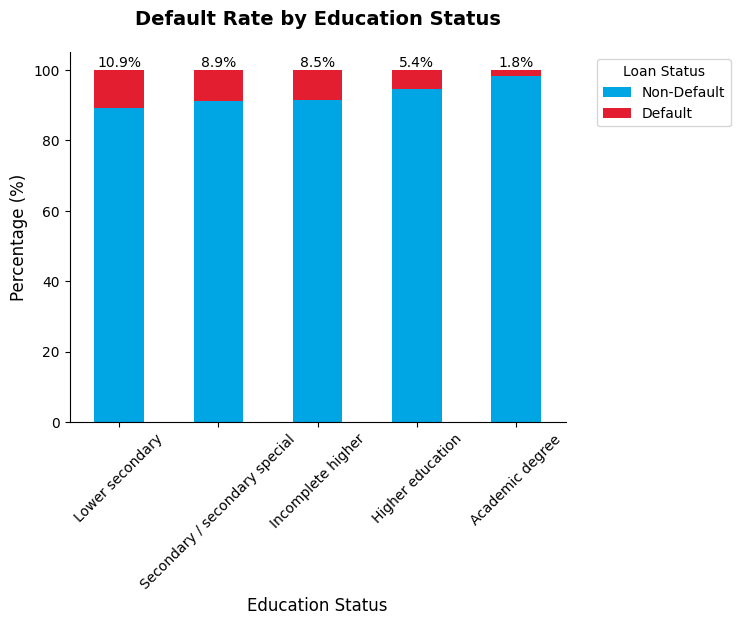

In [35]:
education_default = pd.crosstab(train['NAME_EDUCATION_TYPE'], train['TARGET'], normalize='index') * 100
education_default = education_default.sort_values(by=1, ascending=False)

plt.figure(figsize=(12, 6), dpi=200)
education_default.plot(kind='bar', stacked=True, 
                    color=[colors[0], colors[1]])

plt.title('Default Rate by Education Status', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Education Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

for i in range(len(education_default)):
    default_pct = education_default.iloc[i, 1]
    plt.text(i, 100, f'{default_pct:.1f}%', 
             ha='center', va='bottom')

plt.legend(['Non-Default', 'Default'], 
          title='Loan Status',
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')

plt.xticks(rotation=45)
sns.despine()
plt.show()


### How Client's Status Default based On Their Car Ownership?

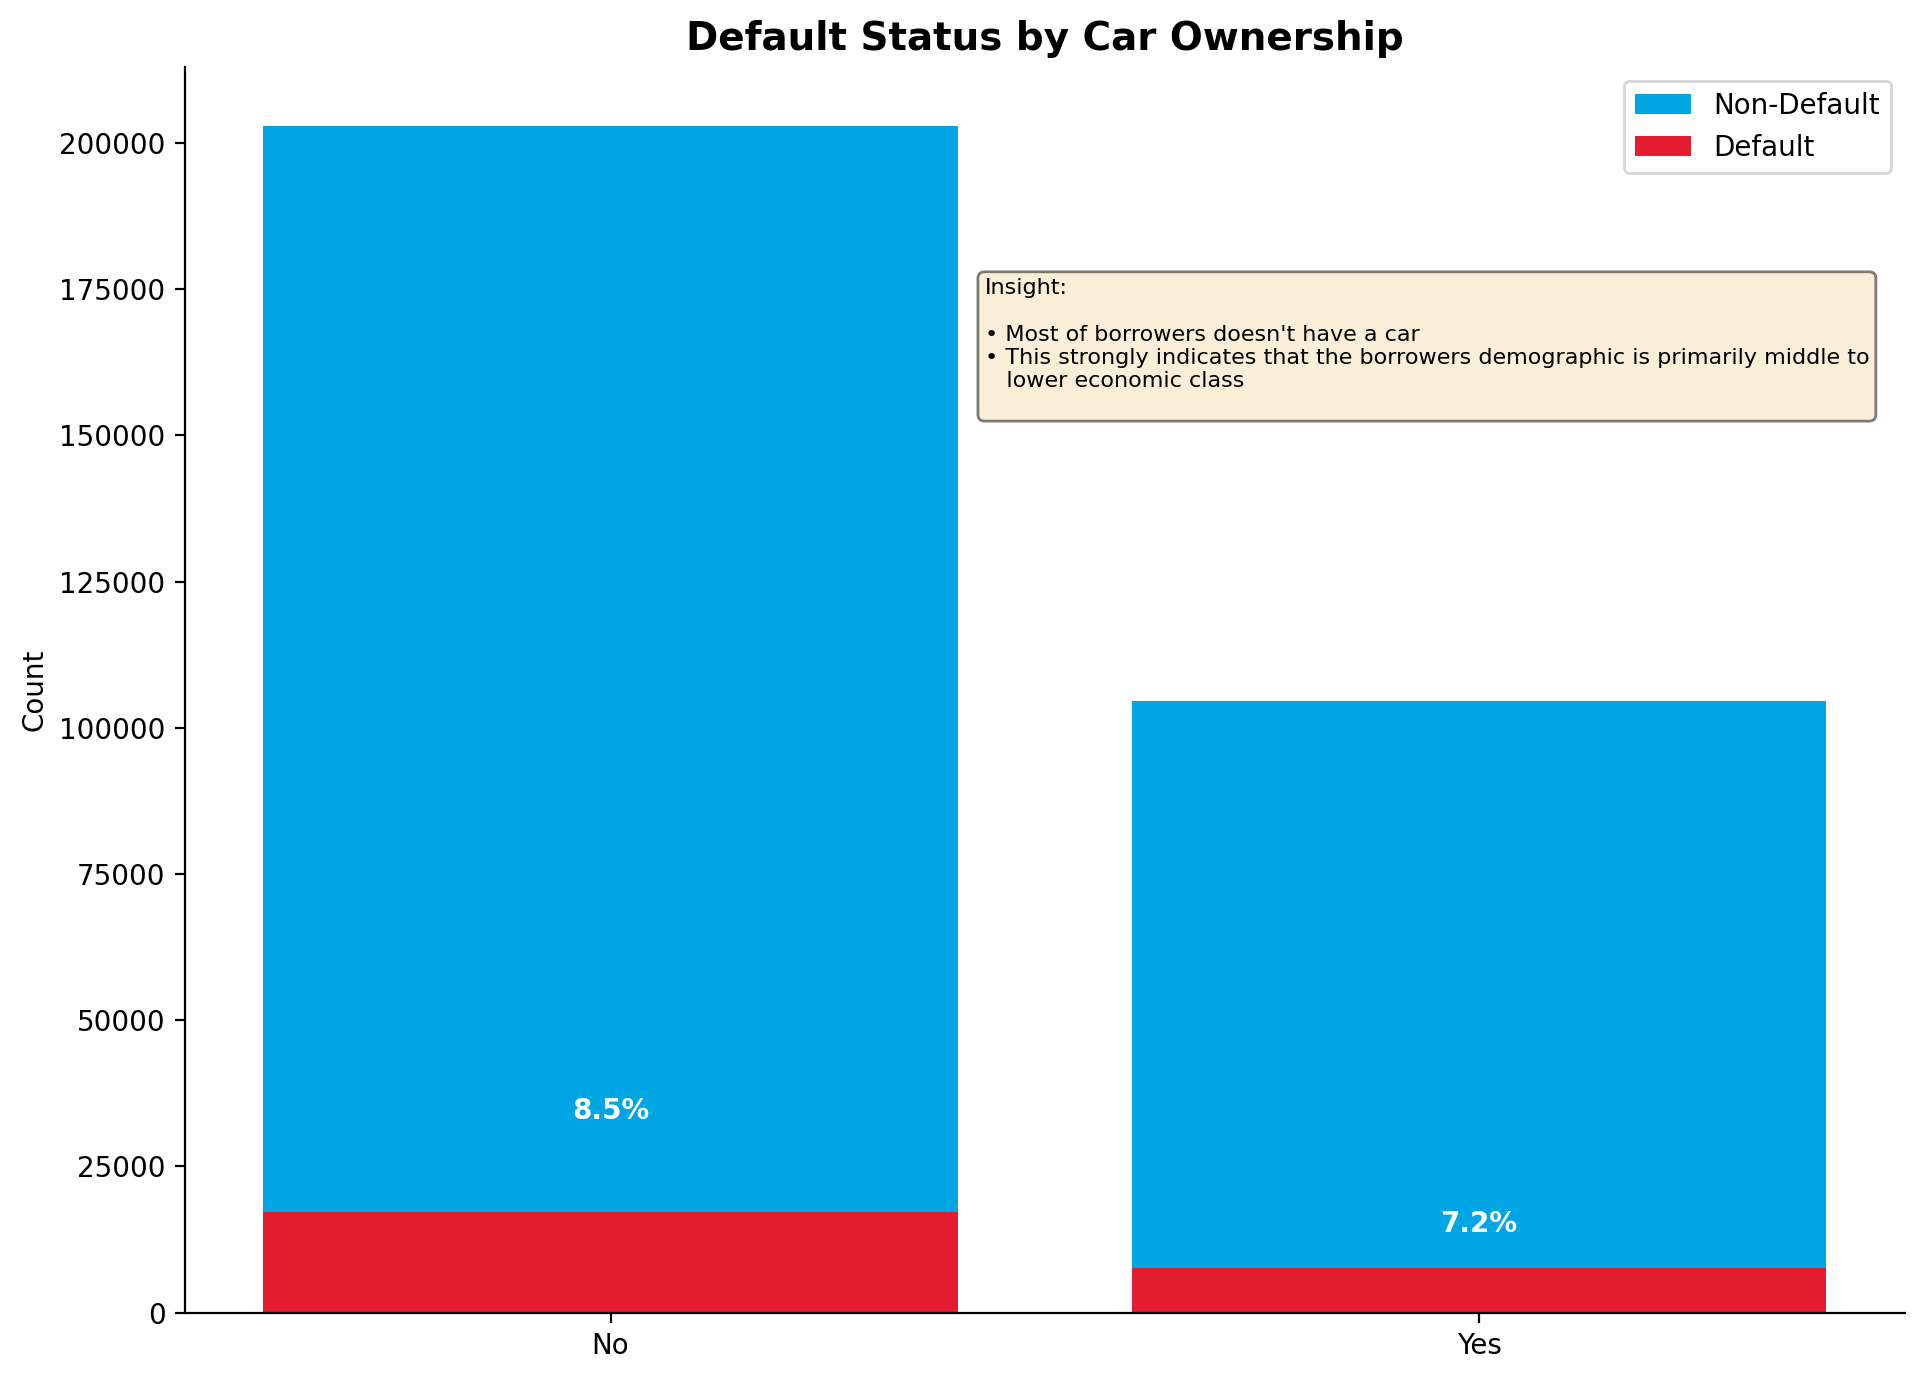

  FLAG_OWN_CAR  TARGET   total       Avg
0           No   17249  202924  0.085002
1          Yes    7576  104587  0.072437


In [80]:
# Create temporary dataframe with aggregated values
temp_car = train.copy()
temp_car['FLAG_OWN_CAR'] = temp_car['FLAG_OWN_CAR'].map({'Y': 'Yes', 'N': 'No'})
temp = pd.DataFrame(temp_car.groupby('FLAG_OWN_CAR')['TARGET'].agg(lambda x: x.eq(1).sum())).reset_index()
temp['total'] = pd.DataFrame(temp_car.groupby('FLAG_OWN_CAR')['TARGET'].agg(total='count')).reset_index()['total']
temp['Avg'] = pd.DataFrame(temp_car.groupby('FLAG_OWN_CAR')['TARGET'].agg(Avg='mean')).reset_index()['Avg']

# Sort values and get top 10
temp.sort_values(by=['total'], inplace=True, ascending=False)
temp = temp[:10]

# Define colors for the bars
colors_default = ['#E41E31', '#E41E31']
colors_non_default= ['#00A6E4', '#00A6E4']

# Create the plot
ind = np.arange(temp.shape[0])
# Create the plot
ind = np.arange(temp.shape[0])
plt.figure(figsize=(10,7), dpi=200)

# Create stacked bars
p1 = plt.bar(ind, temp['total'].values, color=colors_non_default)
p2 = plt.bar(ind, temp['TARGET'].values, color=colors_default)

# Add percentage labels for default portion
for i, v in enumerate(temp['TARGET'].values):
    percentage = (v / temp['total'].values[i]) * 100
    plt.text(i, v*2, f'{percentage:.1f}%', 
             ha='center', va='center', color='white', fontweight='bold', fontsize=10)

# Add description text
desc_text = (
    'Insight:\n\n'
    f"• Most of borrowers doesn't have a car\n"
    f'• This strongly indicates that the borrowers demographic is primarily middle to\n   lower economic class\n'
)

# Add text box
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.465, 0.83, desc_text,
         transform=plt.gca().transAxes,
         fontsize=8,
         verticalalignment='top',
         bbox=props)

# Customize the plot
plt.ylabel('Count')
plt.title('Default Status by Car Ownership', fontsize=14, fontweight='bold')
plt.xticks(ticks=ind, rotation=0, labels=list(temp['FLAG_OWN_CAR'].values))
plt.legend((p1[0], p2[0]), ('Non-Default', 'Default'))

sns.despine()
plt.tight_layout()
plt.show()

# Print the data
print(temp.head(5))


A significant majority of borrowers do not own a car, with a default rate of 8.5% compared to 7.2% for car owners. This suggests that the borrower demographic is primarily from the middle to lower economic class. Home Credit should Develop financial products tailored for non-car owners, focusing on affordability and flexible terms. Enhance credit assessment models by incorporating car ownership as a factor to better gauge economic stability.

<Figure size 2400x1200 with 0 Axes>

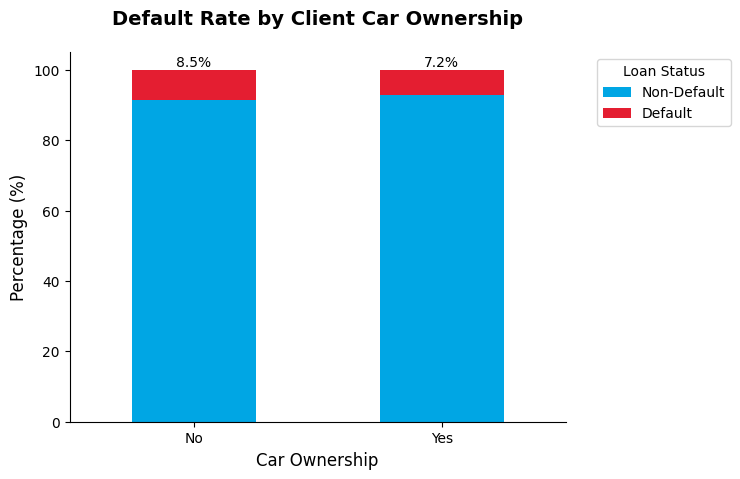

In [37]:
# Hitung persentase default rate untuk tipe kontrak
own_car_default = pd.crosstab(train['FLAG_OWN_CAR'], train['TARGET'], normalize='index') * 100
own_car_default = own_car_default.sort_values(by=1, ascending=False)  # Sort berdasarkan default rate

# Buat plot
plt.figure(figsize=(12, 6), dpi=200)
own_car_default.plot(kind='bar', stacked=True, 
                     color=[colors[0], colors[1]])

# Atur judul dan label
plt.title('Default Rate by Client Car Ownership', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Car Ownership', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
           
# Tambahkan persentase di atas setiap bar
for i in range(len(own_car_default)):
    default_pct = own_car_default.iloc[i, 1]
    plt.text(i, 100, f'{default_pct:.1f}%', 
             ha='center', va='bottom')

# Atur legend
plt.legend(['Non-Default', 'Default'], 
          title='Loan Status',
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')

plt.xticks(range(len(own_car_default)), ['No', 'Yes'], rotation=0)
sns.despine()
plt.show()


### How Client's Status Default based On Their Realty / Property Ownership?

<Figure size 2400x1200 with 0 Axes>

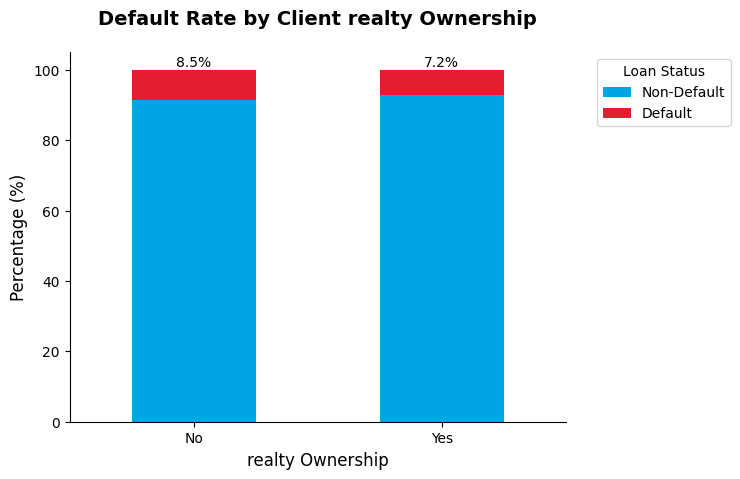

In [38]:
# Hitung persentase default rate untuk tipe kontrak
realty_default = pd.crosstab(train['FLAG_OWN_REALTY'], train['TARGET'], normalize='index') * 100
realty_default = realty_default.sort_values(by=1, ascending=False)  # Sort berdasarkan default rate

# Buat plot
plt.figure(figsize=(12, 6), dpi=200)
own_car_default.plot(kind='bar', stacked=True, 
                     color=[colors[0], colors[1]])

# Atur judul dan label
plt.title('Default Rate by Client realty Ownership', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('realty Ownership', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
           
# Tambahkan persentase di atas setiap bar
for i in range(len(own_car_default)):
    default_pct = own_car_default.iloc[i, 1]
    plt.text(i, 100, f'{default_pct:.1f}%', 
             ha='center', va='bottom')

# Atur legend
plt.legend(['Non-Default', 'Default'], 
          title='Loan Status',
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')

plt.xticks(range(len(own_car_default)), ['No', 'Yes'], rotation=0)
sns.despine()
plt.show()


### How Client's Status Default based On The Population Where They Lives?

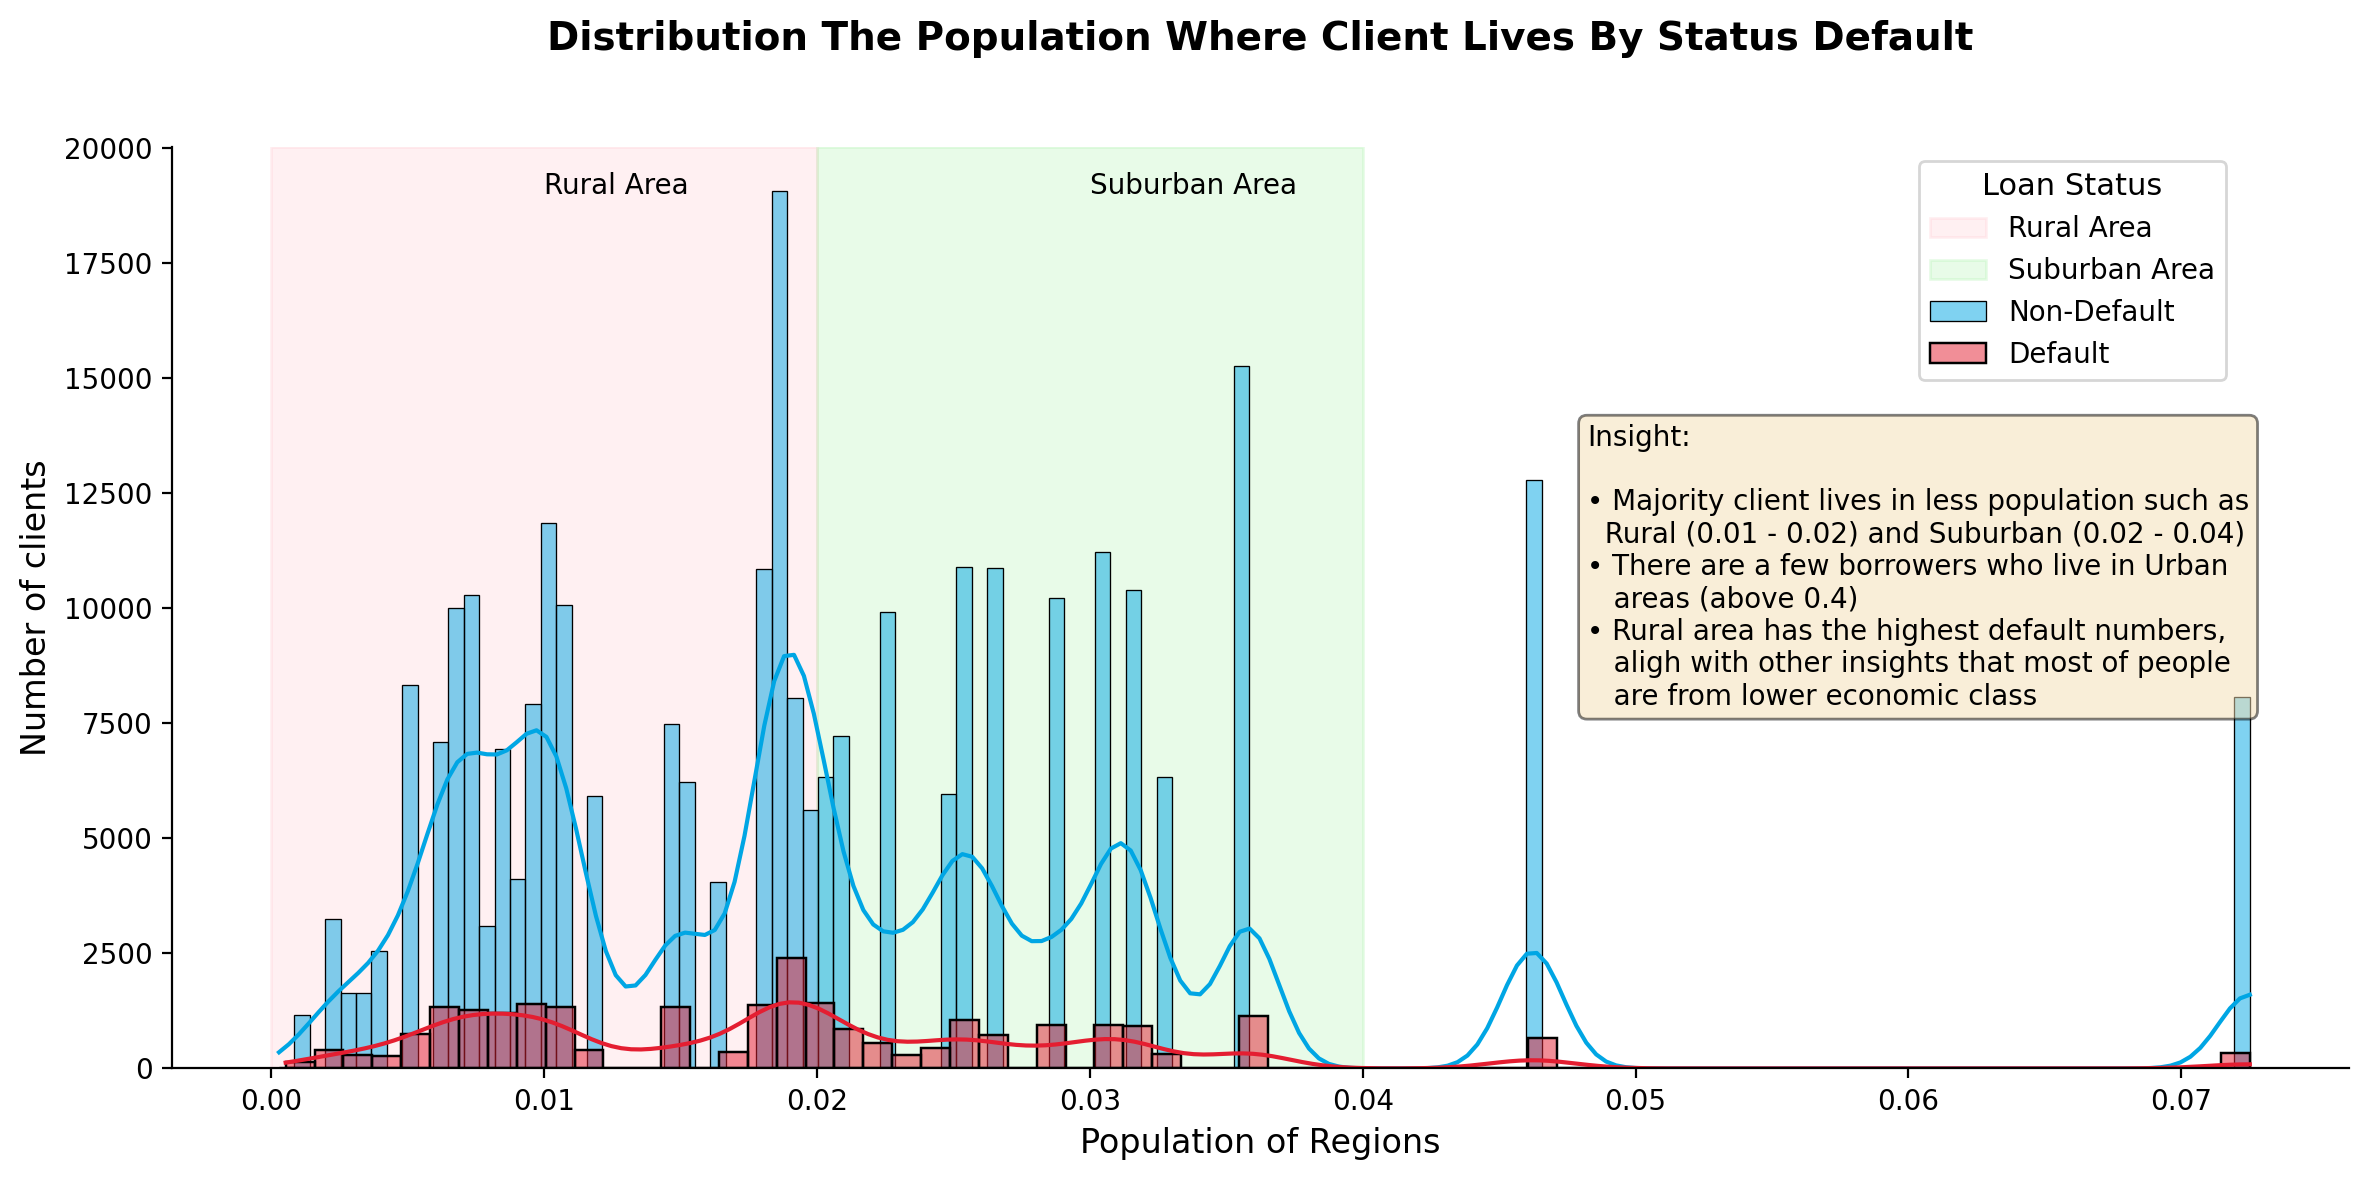

In [39]:
colors = ['#00A6E4', '#E41E31']  # Merah dan Biru Home Credit

plt.figure(figsize=(12, 6), dpi=200)

# Add highlighted areas
plt.axvspan(0.00, 0.02, color='lightpink', alpha=0.2, label='Rural Area')
plt.axvspan(0.02, 0.04, color='lightgreen', alpha=0.2, label='Suburban Area')

sns.histplot(data=train[train['TARGET']==0], x='REGION_POPULATION_RELATIVE', 
             color=colors[0], alpha=0.5, label='Non-Default', kde=True)
sns.histplot(data=train[train['TARGET']==1], x='REGION_POPULATION_RELATIVE', 
             color=colors[1], alpha=0.5, label='Default', kde=True)

# Add text annotations
plt.text(0.01, 19000, 'Rural Area', fontsize=10)
plt.text(0.03, 19000, 'Suburban Area', fontsize=10)

plt.title("Distribution The Population Where Client Lives By Status Default", 
          fontsize=14, fontweight='bold', pad=35)
plt.xlabel('Population of Regions', fontsize=12)
plt.ylabel('Number of clients', fontsize=12)

# Add description text
desc_text = (
    'Insight:\n\n'
    f"• Majority client lives in less population such as\n  Rural (0.01 - 0.02) and Suburban (0.02 - 0.04)\n"
    f'• There are a few borrowers who live in Urban\n   areas (above 0.4)\n'
    f'• Rural area has the highest default numbers,\n   aligh with other insights that most of people\n   are from lower economic class'
)

# Add text box
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.65, 0.7, desc_text,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)

plt.legend(title='Loan Status', title_fontsize=11, 
          fontsize=10, loc='upper right', bbox_to_anchor=(0.95, 1))

sns.despine()
plt.tight_layout()
plt.show()


This insight shows a strong argument that most of people are from middle to lower economics class by the area where they live. Middle to lower class often live in less populated area, such as Rural Area and Suburban area. Home Credit should design financial products tailored to the needs of rural and suburban populations to improve financial inclusion and stability.

### How Client's Status Default based On Region Rating That They lives?

In [40]:
train['REGION_RATING_CLIENT_W_CITY'].value_counts()

REGION_RATING_CLIENT_W_CITY
2    229484
3     43860
1     34167
Name: count, dtype: int64

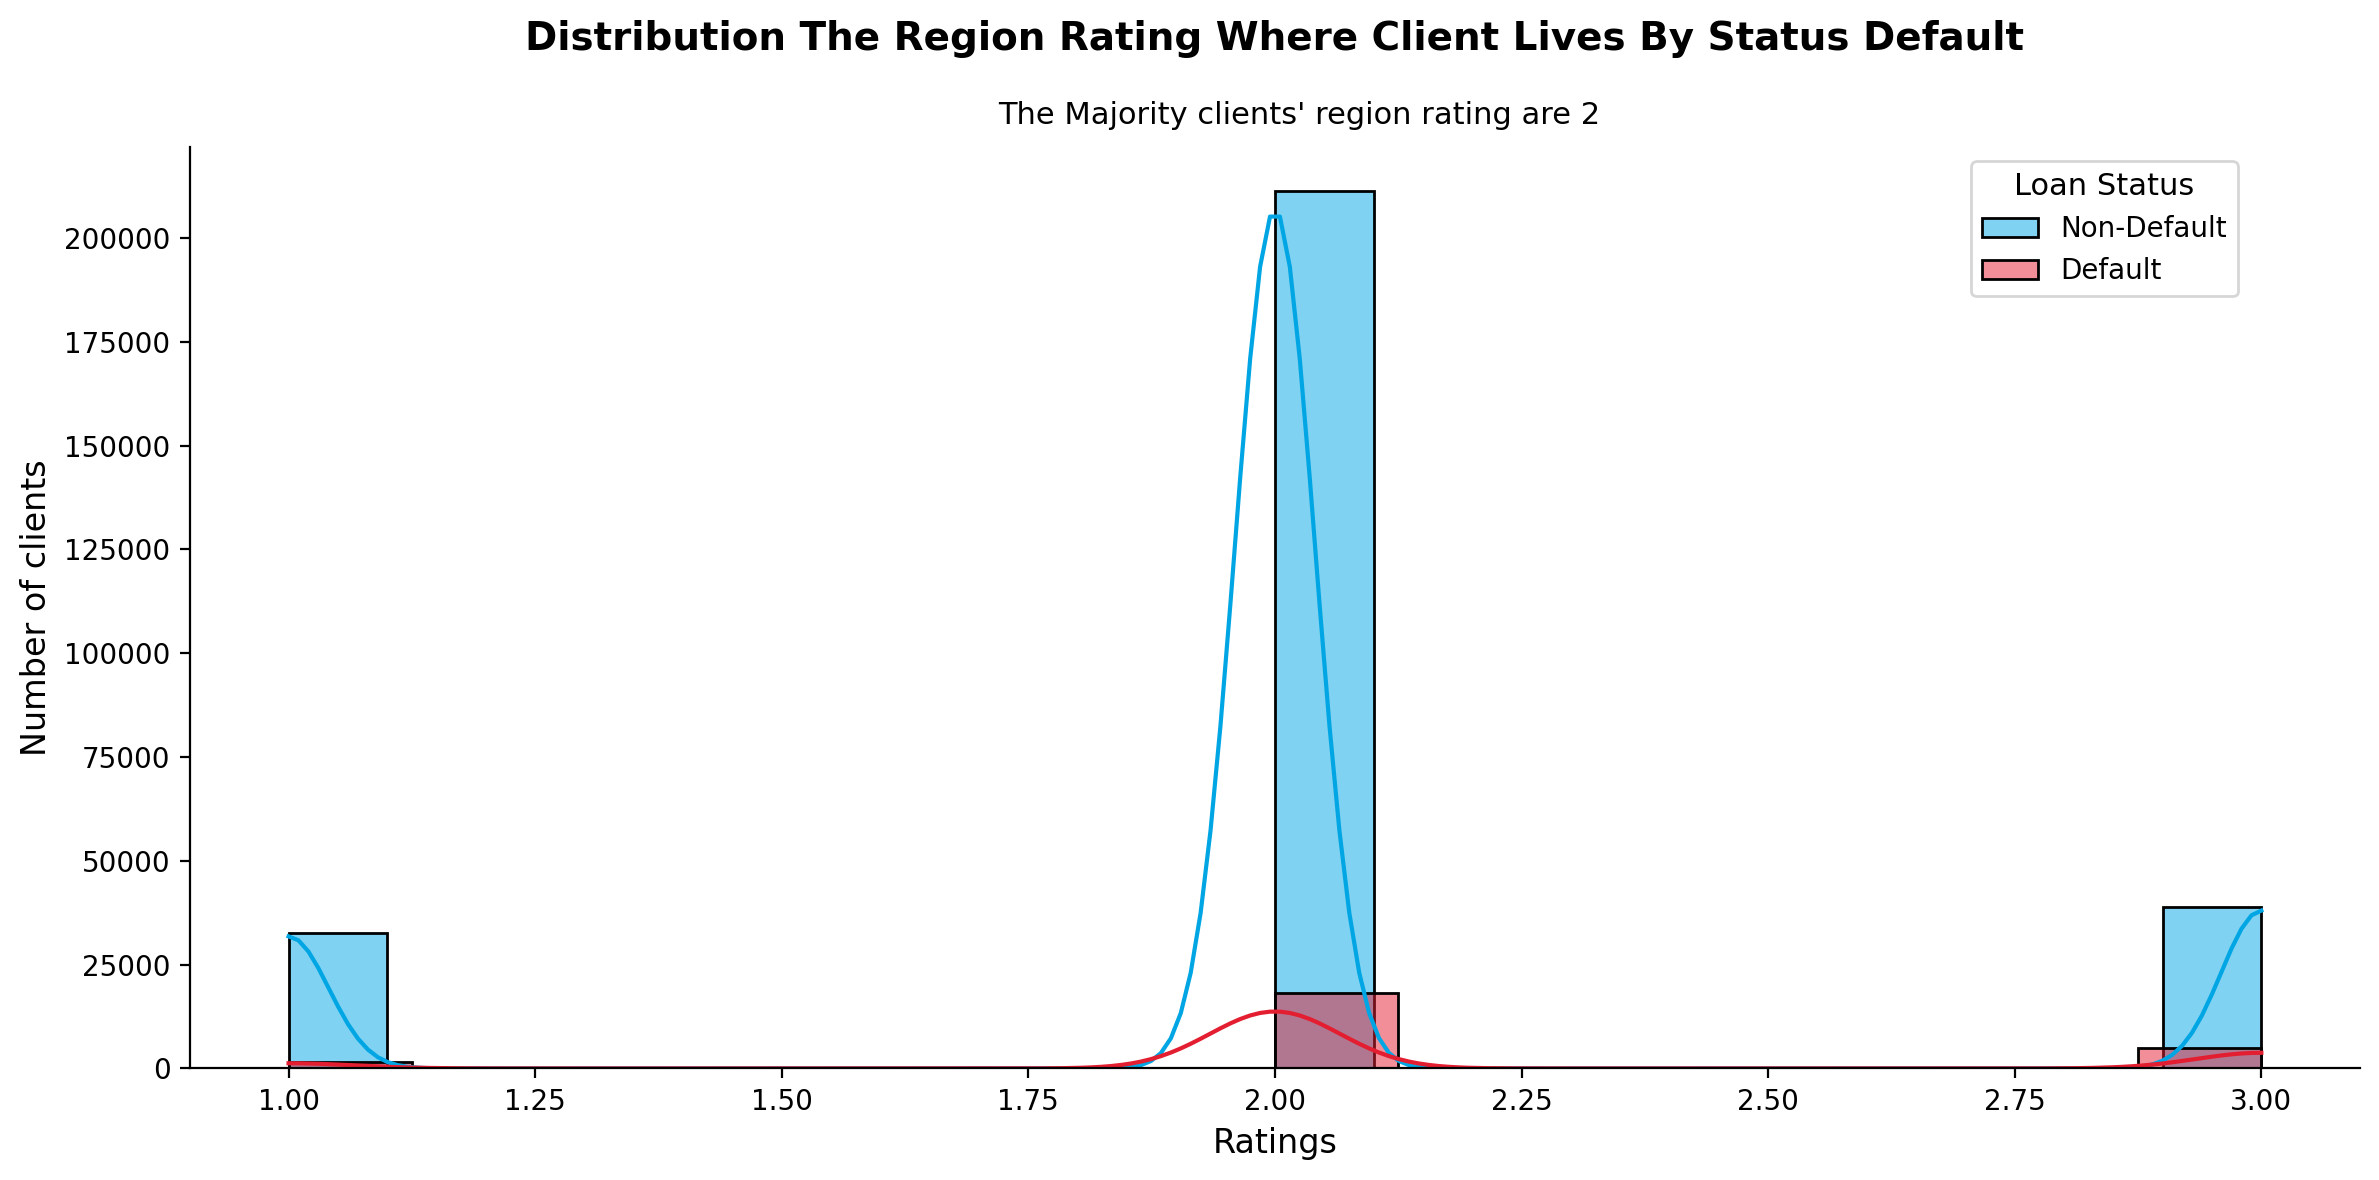

In [41]:
colors = ['#00A6E4', '#E41E31']  # Merah dan Biru Home Credit

plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=train[train['TARGET']==0], x='REGION_RATING_CLIENT_W_CITY', 
             color=colors[0], alpha=0.5, label='Non-Default', kde=True)
sns.histplot(data=train[train['TARGET']==1], x='REGION_RATING_CLIENT_W_CITY', 
             color=colors[1], alpha=0.5, label='Default', kde=True)

plt.title("Distribution The Region Rating Where Client Lives By Status Default", 
          fontsize=14, fontweight='bold', pad=35)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Number of clients', fontsize=12)

plt.text(0.65, 1.05, "The Majority clients' region rating are 2", 
         transform=plt.gca().transAxes, 
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
         ha='right', va='top')

plt.legend(title='Loan Status', title_fontsize=11, 
          fontsize=10, loc='upper right', bbox_to_anchor=(0.95, 1))

sns.despine()
plt.tight_layout()
plt.show()


# Bureu Dataset

- All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample). 
- For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

In [42]:
bureau = pd.read_csv(r'C:\Users\aldiv\Downloads\Data Analyst\Project based intern\Home Credit\Final Tasks\bureau.csv')

In [43]:
data = bureau
dataset_name = 'Application bureau'
print(f'{dataset_name}')
print(f'There are {data.shape[0]} rows data in {dataset_name}')
print(f'There are {data.shape[1]} columns in {dataset_name}')
data.sample(5)

Application bureau
There are 1716428 rows data in Application bureau
There are 17 columns in Application bureau


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
751334,239158,6632650,Closed,currency 1,-463,0,-281.0,-253.0,NaN,0,106564.5,NaN,NaN,0.0,Consumer credit,-245,NaN
565270,371934,5652149,Active,currency 1,-97,0,31111.0,NaN,NaN,0,162000.0,0.0,0.0,0.0,Credit card,-35,NaN
1380171,184504,5391159,Active,currency 1,-112,0,1347.0,NaN,NaN,0,679500.0,649255.5,0.0,0.0,Consumer credit,-21,NaN
1603786,304159,5339399,Closed,currency 1,-337,0,-79.0,-79.0,NaN,0,45000.0,0.0,0.0,0.0,Credit card,-75,NaN
1272550,126851,5271522,Active,currency 1,-308,0,NaN,-36.0,0.0,0,0.0,0.0,0.0,0.0,Credit card,-36,2934.0


In [44]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

## Business Insight

### How Borrowers' Credit Status in Bureau

In [45]:
bureau['CREDIT_ACTIVE'].value_counts()

CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64

In [ ]:
colors = ['#00A6E4', '#E41E31']  # Merah dan Biru Home Credit

plt.figure(figsize=(12, 6), dpi=200)

# Add highlighted areas
plt.axvspan(0.00, 0.02, color='lightpink', alpha=0.2, label='Rural Area')
plt.axvspan(0.02, 0.04, color='lightgreen', alpha=0.2, label='Suburban Area')

sns.histplot(data=train[train['TARGET']==0], x='REGION_POPULATION_RELATIVE', 
             color=colors[0], alpha=0.5, label='Non-Default', kde=True)
sns.histplot(data=train[train['TARGET']==1], x='REGION_POPULATION_RELATIVE', 
             color=colors[1], alpha=0.5, label='Default', kde=True)

# Add text annotations
plt.text(0.01, 19000, 'Rural Area', fontsize=10)
plt.text(0.03, 19000, 'Suburban Area', fontsize=10)

plt.title("Distribution The Population Where Client Lives By Status Default", 
          fontsize=14, fontweight='bold', pad=35)
plt.xlabel('Population of Regions', fontsize=12)
plt.ylabel('Number of clients', fontsize=12)

# Add description text
desc_text = (
    'Insight:\n\n'
    f"• Majority client lives in less population such as\n  Rural (0.01 - 0.02) and Suburban (0.02 - 0.04)\n"
    f'• There are a few borrowers who live in Urban\n   areas (above 0.4)\n'
    f'• Rural area has the highest default numbers,\n   aligh with other insights that most of people\n   are from lower economic class'
)

# Add text box
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.65, 0.7, desc_text,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)

plt.legend(title='Loan Status', title_fontsize=11, 
          fontsize=10, loc='upper right', bbox_to_anchor=(0.95, 1))

sns.despine()
plt.tight_layout()
plt.show()


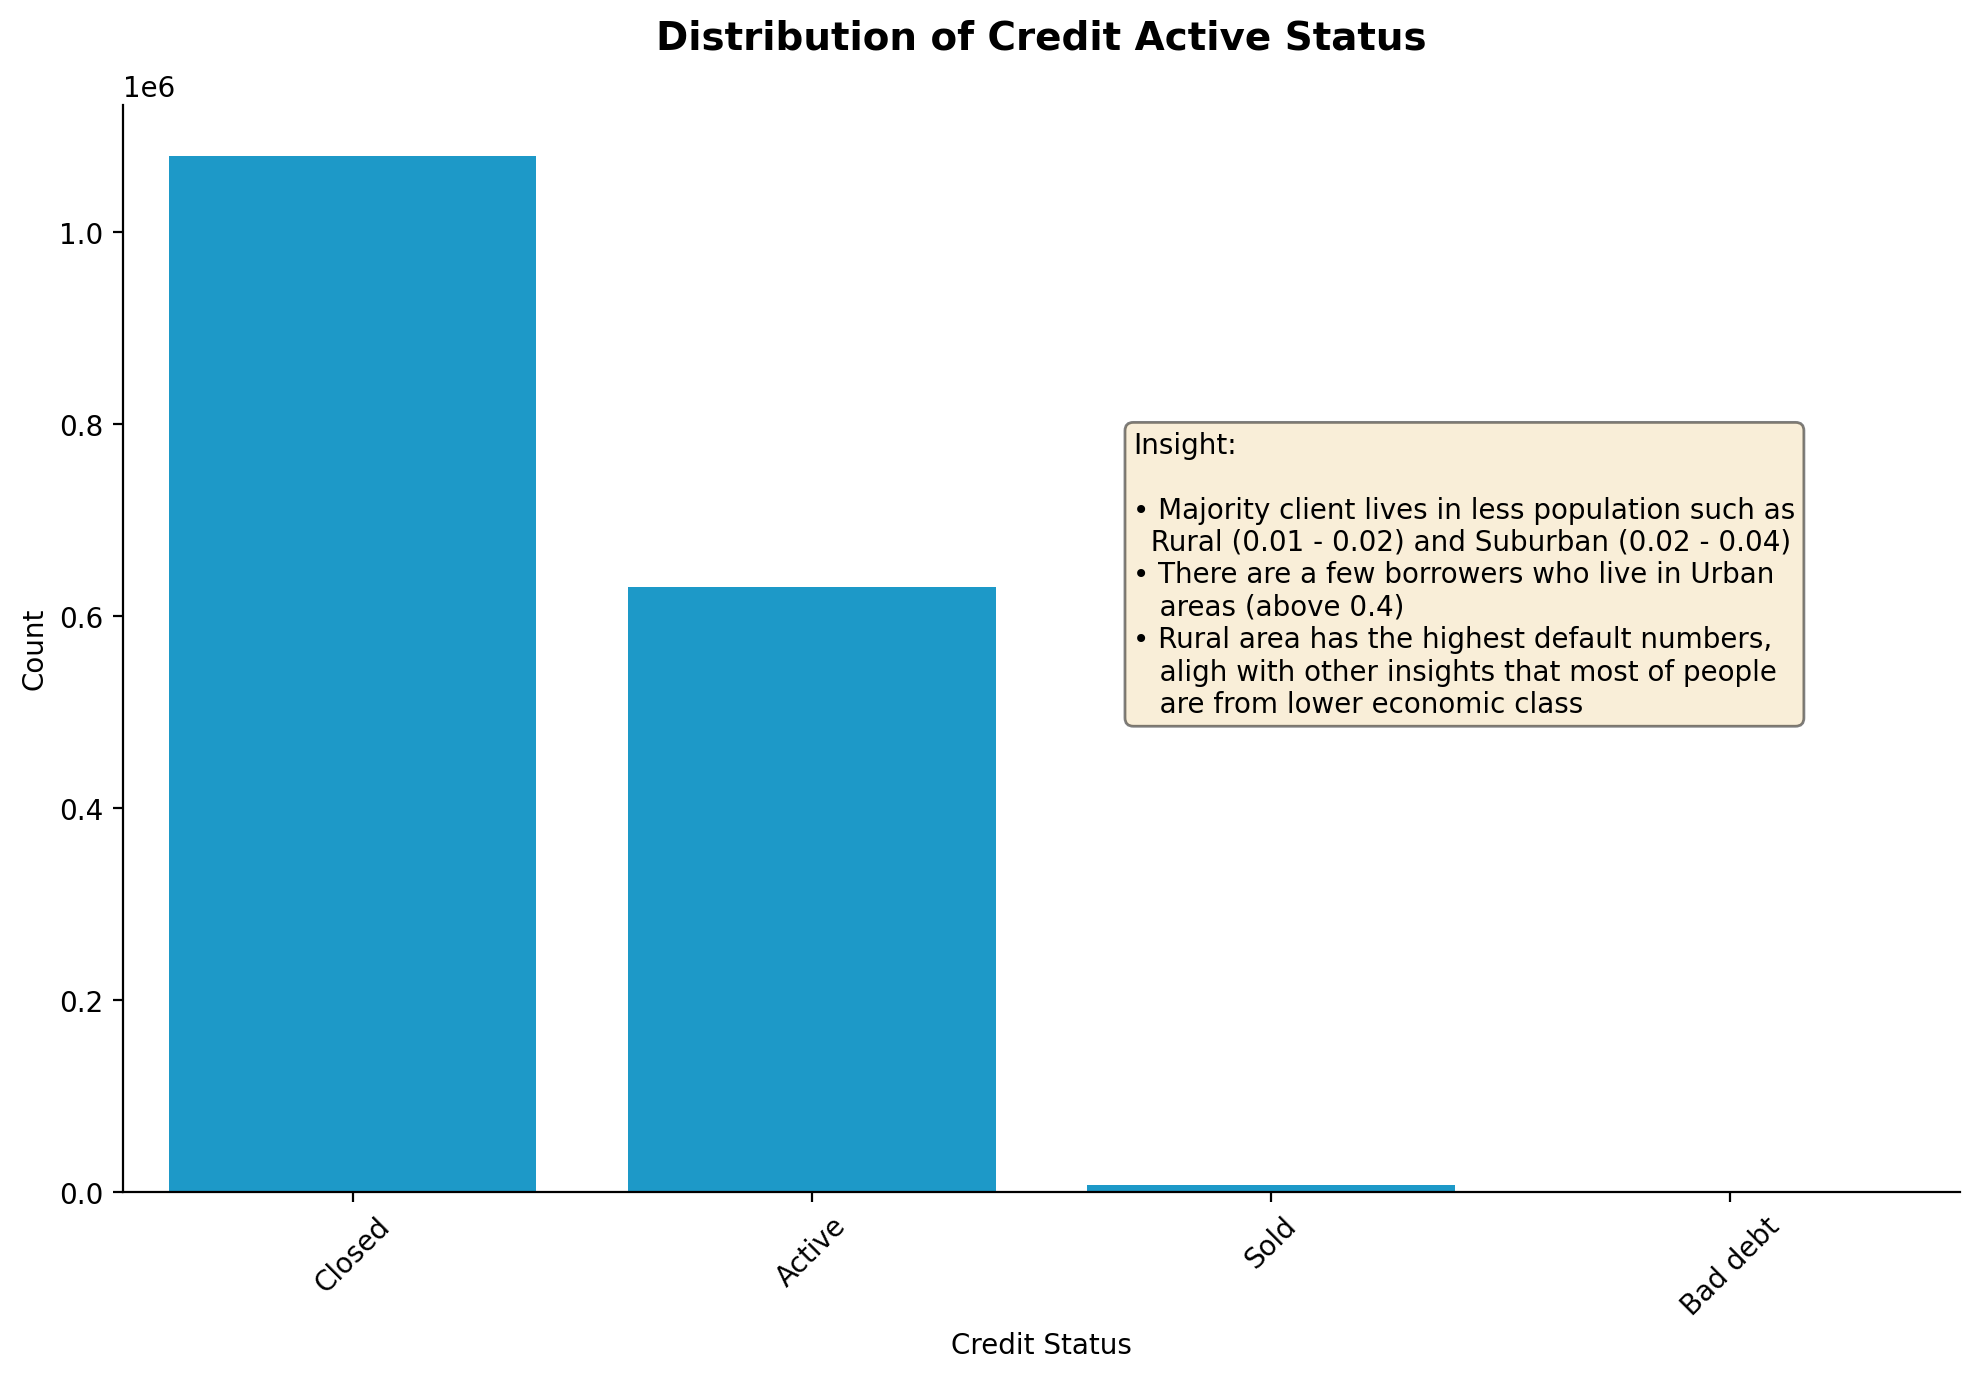

In [ ]:
# Get value counts of CREDIT_ACTIVE
credit_active_counts = bureau['CREDIT_ACTIVE'].value_counts()

# Create plot
plt.figure(figsize=(10,7), dpi=200)

# Create bar plot
bars = sns.barplot(x=credit_active_counts.index, y=credit_active_counts.values, color='#00A6E4')

# Customize plot
plt.title('Distribution of Credit Active Status', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Credit Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add description text
desc_text = (
    'Insight:\n\n'
    f"• \n"
    f'• There are a few borrowers who live in Urban\n   areas (above 0.4)\n'
    f'• Rural area has the highest default numbers,\n   aligh with other insights that most of people\n   are from lower economic class'
)

# Add text box
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.55, 0.7, desc_text,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)

sns.despine()
plt.tight_layout()
plt.show()

### Correlation Between Credit Amount vs Debt Analysis

### What About The Pattern Of Overdue Payments

### Type of Credit in Bureau

### How The Pattern in Credit Timeline

### Credit Limit Utilization

### How Clients' Payment Behavior

# Bureau Balance Dataset

- Monthly balances of previous credits in Credit Bureau. 
- This table has one row for each month of history of every previous credit reported to Credit Bureau

In [47]:
bureau_balance = pd.read_csv(r'C:\Users\aldiv\Downloads\Data Analyst\Project based intern\Home Credit\Final Tasks\bureau_balance.csv')

In [48]:
data = bureau_balance
dataset_name = 'bureau_balance'
print(f'{dataset_name}')
print(f'There are {data.shape[0]} rows data in {dataset_name}')
print(f'There are {data.shape[1]} columns in {dataset_name}')
data.sample(5)

bureau_balance
There are 27299925 rows data in bureau_balance
There are 3 columns in bureau_balance


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
23801784,6109515,-11,C
9846457,6070840,-60,C
16406069,6241860,-3,C
26363201,6601443,-49,C
18206355,5934325,-55,X


# Previous Application Dataset

- All previous applications for Home Credit loans of clients who have loans in our sample. 
- There is one row for each previous application related to loans in our data sample.

In [49]:
previous_app = pd.read_csv(r'C:\Users\aldiv\Downloads\Data Analyst\Project based intern\Home Credit\Final Tasks\previous_application.csv')

In [50]:
data = previous_app
dataset_name = 'previous app'
print(f'{dataset_name}')
print(f'There are {data.shape[0]} rows data in {dataset_name}')
print(f'There are {data.shape[1]} columns in {dataset_name}')
data.sample(5)

previous app
There are 1670214 rows data in previous app
There are 37 columns in previous app


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1103035,1930534,191956,Cash loans,39604.500,1350000.0,1350000.0,NaN,1350000.0,MONDAY,12,...,XNA,60.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
627365,1237474,377020,Cash loans,43224.660,1170000.0,1339884.0,NaN,1170000.0,MONDAY,12,...,XNA,60.0,low_normal,Cash X-Sell: low,365243.0,-656.0,1114.0,-236.0,-225.0,1.0
450742,2781798,125496,Cash loans,18670.725,405000.0,479844.0,NaN,405000.0,TUESDAY,18,...,XNA,48.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN
788269,1920169,210559,Consumer loans,8506.305,78255.0,78255.0,0.0,78255.0,THURSDAY,15,...,Industry,10.0,low_action,POS others without interest,365243.0,-556.0,-286.0,-316.0,-312.0,0.0
262921,1108546,148545,Consumer loans,6296.715,44064.0,32368.5,13221.0,44064.0,SUNDAY,11,...,Industry,6.0,middle,POS other with interest,365243.0,-1619.0,-1469.0,-1499.0,-1496.0,0.0


# Installments Payments Dataset

- Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample. 
- There are: <br>
    a) one row for every payment that was made plus <br>
    b) one row each for missed payment. <br>
- One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

In [51]:
installments_payment = pd.read_csv(r'C:\Users\aldiv\Downloads\Data Analyst\Project based intern\Home Credit\Final Tasks\installments_payments.csv')

In [52]:
data = installments_payment
dataset_name = 'installments payment'
print(f'{dataset_name}')
print(f'There are {data.shape[0]} rows data in {dataset_name}')
print(f'There are {data.shape[1]} columns in {dataset_name}')
data.sample(5)

installments payment
There are 13605401 rows data in installments payment
There are 8 columns in installments payment


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
5670120,1334414,243725,0.0,87,-477.0,-477.0,9900.000,9900.000
1752707,2161585,169641,1.0,9,-2568.0,-2573.0,15584.850,15584.850
1463752,1543539,197951,1.0,10,-1917.0,-1930.0,14308.470,14308.470
4997907,2331409,213081,1.0,4,-1425.0,-1431.0,34512.660,34512.660
2810467,2149486,176788,1.0,8,-376.0,-376.0,24344.055,24344.055


# Credit Card Balance Dataset

- Monthly balance snapshots of previous credit cards that the applicant has with Home Credit. 
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample

In [53]:
credit_card_balance = pd.read_csv(r'C:\Users\aldiv\Downloads\Data Analyst\Project based intern\Home Credit\Final Tasks\credit_card_balance.csv')

In [54]:
data = credit_card_balance
dataset_name = 'credit card balance'
print(f'{dataset_name}')
print(f'There are {data.shape[0]} rows data in {dataset_name}')
print(f'There are {data.shape[1]} columns in {dataset_name}')
data.sample(5)

credit card balance
There are 3840312 rows data in credit card balance
There are 23 columns in credit card balance


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
286630,2486119,451227,-23,0.000,0,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3287000,1738628,271251,-1,178845.390,175500,0.0,0.0,0.0,0.0,9021.465,...,176186.070,176186.070,0.0,0,0.0,0.0,8.0,Active,0,0
3006938,1383110,100340,-72,64573.470,112500,45000.0,45000.0,0.0,0.0,6750.000,...,64573.470,64573.470,2.0,2,0.0,0.0,34.0,Active,0,0
984077,2621814,277655,-74,151933.275,180000,0.0,0.0,0.0,0.0,9000.000,...,151933.275,151933.275,0.0,0,0.0,0.0,4.0,Active,0,0
2306777,1220519,369432,-18,0.000,135000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


# POS CASH balance Dataset

- Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit. 
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample 

In [55]:
pos_cash_balance = pd.read_csv(r'C:\Users\aldiv\Downloads\Data Analyst\Project based intern\Home Credit\Final Tasks\POS_CASH_balance.csv')

In [56]:
data = pos_cash_balance
dataset_name = 'pos cash balance'
print(f'{dataset_name}')
print(f'There are {data.shape[0]} rows data in {dataset_name}')
print(f'There are {data.shape[1]} columns in {dataset_name}')
data.sample(5)

pos cash balance
There are 10001358 rows data in pos cash balance
There are 8 columns in pos cash balance


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
9858400,1110423,438626,-62,12.0,1.0,Active,0,0
2028504,1009383,268932,-91,6.0,0.0,Active,0,0
6781648,2221168,408518,-31,6.0,3.0,Active,0,0
6143702,1160362,252599,-12,24.0,17.0,Active,0,0
6741084,2820052,122162,-10,10.0,7.0,Active,0,0
